# 04. Linear Regression | الانحدار الخطي

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 04, Unit 1** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 04. Linear Regression | الانحدار الخطي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 1: Data Loading and Exploration** - Know your data
- ✅ **Example 2: Data Cleaning** - Have clean data
- ✅ **Example 3: Data Preprocessing** - Have preprocessed data ready
- ✅ **Basic math**: Understanding of lines, slopes, equations

**If you haven't completed these**, you might struggle with:
- Understanding why we need regression
- Knowing how to evaluate model performance
- Understanding the difference between simple and multiple regression

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FOURTH example** - it's your first machine learning model!

**Why this example FOURTH?**
- **Before** you can build ML models, you need clean, preprocessed data
- **Before** you can predict, you need to understand the simplest model first
- **Before** you can use complex models, you need to master the basics

**Builds on**: 
- 📓 Example 1: Data Loading (we know our data)
- 📓 Example 2: Data Cleaning (we have clean data)
- 📓 Example 3: Data Preprocessing (we have ML-ready data)

**Leads to**: 
- 📓 Example 5: Polynomial Regression (extends linear regression)
- 📓 Unit 2: Advanced Regression (Ridge, Lasso)
- 📓 All ML models (linear regression is the foundation!)

**Why this order?**
1. Linear regression is the **simplest ML model** (easy to understand)
2. Linear regression teaches you **model evaluation** (essential for all ML)
3. Linear regression shows you **the ML workflow** (fit, predict, evaluate)

**📚 Related Content:**
- **Course 02, Notebook 5**: For an introduction to ML concepts and how linear regression fits into the broader AI landscape, see `Course 02/NOTEBOOKS/05_AI_Learning_Models.ipynb`
- **Why both exist**: Course 02 introduces ML concepts at a high level. This Course 04 example provides **detailed, hands-on implementation** with full ML pipeline (data processing, evaluation, visualization).
- **📖 Course Navigation**: For a complete guide to navigating between courses and understanding duplications, see `COURSE_MAP.md` in the root directory.

---

## The Story: Finding the Best Line | القصة: إيجاد أفضل خط

Imagine you're trying to predict transaction amounts in financial investigations. **Before** using linear regression, you guess randomly or use simple averages. **After** learning linear regression, you find the best line that predicts transaction amount based on time patterns - much more accurate!

Same with machine learning: **Before** building models, we have data but no predictions. **After** linear regression, we can predict continuous values (like transaction amounts) from features (like Time, transaction patterns)!

---

## Why Linear Regression Matters | لماذا يهم الانحدار الخطي؟

Linear regression is the foundation of machine learning:
- **Simplest ML Model**: Easy to understand and interpret
- **Fast and Efficient**: Works quickly even on large datasets
- **Interpretable**: You can see exactly how features affect predictions
- **Foundation**: Many advanced models build on linear regression concepts
- **Real-World Use**: Used in finance, healthcare, marketing, and more

---

## 🌍 Real-World Applications | التطبيقات في الحياة الواقعية

**Linear Regression is used in MANY industries and situations!** Here's where you'll find it:

### 💰 Finance & Banking Sector | القطاع المالي والمصرفي
- **Stock Price Prediction**: Predict stock prices based on market indicators, company earnings, economic factors
- **Credit Risk Assessment**: Predict loan default risk based on income, credit history, employment status
- **Insurance Premiums**: Calculate insurance premiums based on age, health, location, coverage amount
- **Real Estate Valuation**: Predict property prices based on location, size, age, amenities
- **Sales Forecasting**: Predict future sales based on historical data, marketing spend, seasonality

### 🏥 Healthcare & Medical Sector | القطاع الصحي والطبي
- **Drug Dosage Calculation**: Predict optimal drug dosage based on patient weight, age, medical history
- **Disease Progression**: Predict disease progression based on symptoms, test results, patient demographics
- **Medical Cost Prediction**: Predict treatment costs based on diagnosis, procedures, hospital stay
- **Patient Readmission Risk**: Predict likelihood of patient readmission based on medical history
- **BMI and Health Metrics**: Predict health outcomes based on lifestyle factors

### 📊 Marketing & E-commerce Sector | قطاع التسويق والتجارة الإلكترونية
- **Customer Lifetime Value**: Predict how much a customer will spend over their lifetime
- **Sales Revenue Prediction**: Predict sales based on advertising spend, season, promotions
- **Price Optimization**: Predict optimal pricing based on demand, competition, costs
- **Website Traffic Prediction**: Predict website visits based on marketing campaigns, seasonality
- **Conversion Rate Prediction**: Predict purchase probability based on user behavior

### 🏭 Manufacturing & Supply Chain | التصنيع وسلسلة التوريد
- **Demand Forecasting**: Predict product demand based on historical sales, seasonality, trends
- **Quality Control**: Predict product quality based on manufacturing parameters
- **Inventory Management**: Predict optimal inventory levels based on demand patterns
- **Equipment Maintenance**: Predict maintenance needs based on usage, age, operating conditions
- **Production Cost Estimation**: Predict production costs based on materials, labor, overhead

### 🚗 Transportation & Logistics | النقل والخدمات اللوجستية
- **Delivery Time Prediction**: Predict delivery times based on distance, traffic, weather
- **Fuel Consumption**: Predict fuel usage based on distance, vehicle type, driving conditions
- **Route Optimization**: Predict travel time for different routes
- **Fleet Management**: Predict maintenance needs based on mileage, usage patterns

### 🎓 Education Sector | قطاع التعليم
- **Student Performance Prediction**: Predict grades based on attendance, study hours, previous performance
- **Admission Prediction**: Predict admission chances based on test scores, GPA, extracurriculars
- **Resource Allocation**: Predict resource needs based on enrollment, demographics

### 🏛️ Government & Public Safety Sector (Ministry of Interior) | القطاع الحكومي والسلامة العامة (وزارة الداخلية)
- **Traffic Flow Prediction**: Predict traffic volume based on time, weather, events → optimize traffic management
- **Emergency Response Time**: Predict response time based on distance, traffic, time of day → optimize emergency services
- **Crime Rate Prediction**: Predict crime rates based on demographics, time, location → crime prevention planning
- **Resource Allocation**: Predict resource needs (personnel, vehicles) based on demand patterns → optimize operations
- **Traffic Accident Prediction**: Predict accident likelihood based on weather, traffic, road conditions → traffic safety
- **Border Crossing Volume**: Predict border traffic based on time, season, events → border security planning
- **Emergency Call Volume**: Predict call volume based on time, events, weather → optimize dispatch centers
- **Security Personnel Needs**: Predict staffing needs based on threat levels, events → internal organization
- **Traffic Signal Timing**: Predict optimal signal timing based on traffic patterns → reduce congestion
- **Public Safety Resource Planning**: Predict resource needs based on population, events → emergency preparedness

### 💡 Why Linear Regression is Popular in These Sectors:
- **Interpretability**: Easy to explain to non-technical stakeholders (managers, clients)
- **Fast Predictions**: Quick to train and make predictions (important for real-time systems)
- **Baseline Model**: Often used as a starting point before trying complex models
- **Regulatory Compliance**: Some industries require interpretable models (finance, healthcare)
- **Cost-Effective**: Simple to implement and maintain

### 📈 When to Use Linear Regression:
✅ **Use Linear Regression when:**
- Relationship between features and target is approximately linear
- Need interpretable model (understandable by business stakeholders)
- Working with continuous target variable (prices, quantities, scores)
- Need fast predictions on large datasets
- Want a baseline model before trying complex algorithms

❌ **Don't use Linear Regression when:**
- Relationship is highly non-linear (use polynomial regression or other models)
- Need to predict categories (use classification instead)
- Data has complex interactions between features
- Need to capture non-linear patterns

---

## Learning Objectives | أهداف التعلم
1. Build simple linear regression (one feature)
2. Build multiple linear regression (multiple features)
3. Evaluate models using MSE, MAE, and R²
4. Visualize regression results and residuals
5. Understand feature importance from coefficients
6. Know when linear regression is appropriate

In [47]:
# Step 1: Import necessary libraries
# These libraries help us build and evaluate linear regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # The regression model!
from sklearn.metrics import (
    mean_squared_error,    # MSE - measures average squared error
    mean_absolute_error,   # MAE - measures average absolute error
    r2_score              # R² - measures how well model fits (0-1, higher is better)
)

print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print("   - LinearRegression: Builds the regression model")
print("   - train_test_split: Splits data for training and testing")
print("   - MSE/MAE/R²: Metrics to evaluate model performance")

✅ Libraries imported successfully!

📚 What each tool does:
   - LinearRegression: Builds the regression model
   - train_test_split: Splits data for training and testing
   - MSE/MAE/R²: Metrics to evaluate model performance


## Setting the Scene | إعداد المشهد

**BEFORE**: We have clean, preprocessed data, but we can't make predictions yet.

**AFTER**: We'll build our first ML model - linear regression - to predict continuous values (like prices) from features (like size)!

**Why this matters**: Linear regression is the foundation of ML. Master this, and you understand how all ML models work!

In [48]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("=" * 60)
print("Example 4: Linear Regression")
print("مثال 4: الانحدار الخطي")
print("=" * 60)

Example 4: Linear Regression
مثال 4: الانحدار الخطي


## Part 1: Simple Linear Regression | الجزء الأول: الانحدار الخطي البسيط

**BEFORE**: We have one feature (Time) and want to predict Amount, but we don't know the relationship.

**AFTER**: We'll find the best line (y = mx + b) that predicts Amount from Time!

**⚠️ Important Note About Expected Performance:**

You might see a low or negative R² in this section. **This is EXPECTED and INTENTIONAL!**

- We're using only ONE feature (Time) to teach the basics
- Time alone is NOT a strong predictor of Amount (this is realistic!)
- Low performance here demonstrates WHY we need multiple features
- In Part 2, we'll add more features and see BETTER performance

**This is a teaching strategy**: Simple model → See limitations → Understand why we need complexity!

**Why start with simple regression?**
- **One feature**: Easy to understand and visualize
- **Linear relationship**: Amount = slope × Time + intercept
- **Foundation**: Once you understand this, multiple regression is easy
- **Interpretable**: You can see exactly how Time affects Amount

**Why is this valuable for GDI work?**
- **Understand Basics**: Master the simplest ML model before complex ones
- **Learn ML Workflow**: See the complete process (data → model → evaluate → interpret)
- **Foundation for Fraud Detection**: Simple models help you understand what features matter
- **Build Intuition**: Seeing how one feature (Time) affects Amount helps understand patterns
- **Step to Better Models**: Once you understand simple regression, you can build more sophisticated fraud detection models


In [49]:
print("\n" + "=" * 60)
print("1. Simple Linear Regression (One Feature)")
print("الانحدار الخطي البسيط (ميزة واحدة)")
print("=" * 60)


1. Simple Linear Regression (One Feature)
الانحدار الخطي البسيط (ميزة واحدة)


### Why Split Data into Train and Test? | لماذا نقسم البيانات إلى تدريب واختبار؟

**BEFORE**: We have all our data (features X and target y), but we can't use all of it for training!

**AFTER**: We'll split data into training set (80%) and test set (20%) to properly evaluate our model!

**Why split data?**

**The Problem**: If we train AND test on the same data, the model will "memorize" the data instead of learning patterns!
- **Example**: Like a student who memorizes answers to specific questions
- **Result**: Model gets perfect scores on training data, but fails on new data
- **This is called "Overfitting"** - model memorizes instead of learning

**The Solution**: Split data into TWO separate sets:
1. **Training Set (X_train, y_train)** - 80% of data
   - **Purpose**: Model LEARNS from this data
   - **What happens**: Model sees features (X_train) and correct answers (y_train)
   - **Process**: Model finds the best line that fits this data
   - **Like**: Student studying from a textbook

2. **Test Set (X_test, y_test)** - 20% of data
   - **Purpose**: Model is EVALUATED on this data
   - **What happens**: Model sees features (X_test) but NOT answers (y_test)
   - **Process**: Model makes predictions, we compare with actual answers
   - **Like**: Student taking an exam (unseen questions)

**Why this works:**
- Model learns patterns from training data (not memorizing)
- Test data is "unseen" - model hasn't seen it during training
- If model performs well on test data → model learned general patterns!
- If model performs poorly on test data → model overfitted (memorized training data)

**What are X_train, X_test, y_train, y_test?**
- **X_train**: Training features (inputs) - what model learns from
- **y_train**: Training targets (outputs) - correct answers for training
- **X_test**: Test features (inputs) - what model predicts on
- **y_test**: Test targets (outputs) - correct answers for evaluation

**Additional Notes:**

**Why 80/20 split?**
- Good balance - need enough training data (80%) to learn, enough test data (20%) to evaluate
- Can adjust: Small datasets (<1000) → 70/30, Large datasets (>10k) → 90/10

**Can I use test data for training?**
- NO! Never use test data for training - this defeats the purpose!
- Problem: If model sees test data during training, it's not a fair test
- Rule: Test data should be "locked away" until final evaluation

**What if I need more training data?**
- Use cross-validation (Unit 2) - splits data multiple ways without wasting test set

**Why split X and y separately?**
- X (features) and y (target) must stay together!
- Each row in X_train corresponds to same row in y_train
- train_test_split keeps them aligned automatically

In [50]:
# Load real-world financial transaction dataset (GDI-themed)
# Using publicly available dataset - relevant to GDI financial investigations
# Source: Online dataset (GitHub or Kaggle)
# Theme: Financial Investigation - Transaction Pattern Analysis

print("\n📥 Loading real-world financial transaction dataset from online source...")
print("تحميل مجموعة بيانات المعاملات المالية الحقيقية من مصدر عبر الإنترنت...")

# Load Credit Card Fraud dataset from local file
# This demonstrates predicting transaction amounts based on time patterns

try:
    # Option 1: Try loading from a public financial dataset URL
    # Note: Credit Card Fraud dataset requires Kaggle account, so we'll use alternative
    
    # Option 2: Use a well-known public dataset that can be loaded directly
    # Using a dataset that simulates financial transactions
    # For educational purposes, we'll use a dataset that can be loaded from URL
    
    # Try loading from GitHub (if available) or use sklearn with clear GDI context
    # Since Credit Card Fraud requires Kaggle API, we'll use sklearn dataset
    # but with CLEAR financial investigation context
    
    # Load real Credit Card Fraud dataset (GDI Theme: Financial Investigations)
    df_full = pd.read_csv('../../datasets/raw/creditcard_fraud.csv')
    print(f"\n✅ Real-world Credit Card Fraud data loaded from local file!")
    print(f"   📊 Full dataset: {len(df_full):,} transactions")
    
    # For learning linear regression, use a sample for faster execution
    sample_size = 5000  # Use 5k samples for faster execution
    df = df_full.sample(n=min(sample_size, len(df_full)), random_state=73, replace=False).reset_index(drop=True)
    print(f"   📊 Using sample: {len(df):,} transactions (for faster learning)")
    print(f"   💡 Note: Using a sample for learning convenience. In real projects, use full dataset.")
    
    # For linear regression, we'll predict Amount (continuous target) from Time (continuous feature)
    df_simple = df[['Time', 'Amount']].copy()
    
    print(f"\n✅ Dataset prepared for linear regression!")
    print(f"   📊 Dataset contains {len(df_simple)} transaction records")
    print(f"   📈 Feature: Time (seconds elapsed) - predictor variable")
    print(f"   💰 Target: Amount (transaction amount in dollars) - what we predict")
    print(f"\n📊 Sample Data:")
    print(df_simple.head().round(2))
    print(f"\n📐 Data Shape: {df_simple.shape}")
    print("\n📊 Dataset Statistics:")
    print(df_simple.describe().round(2))
    print("\n🔍 Notice:")
    print("   - REAL anonymized credit card transaction data")
    print("   - Linear regression: Predict transaction Amount based on Time")
    print("   - Perfect for learning linear regression!")
    print("   🎯 Domain: GDI Financial Investigations - Transaction Pattern Analysis")
    print("   📋 Note: V1-V28 are PCA-transformed features (already scaled)")
    print("            We'll use Time for simple regression, then add V features for multiple regression")
    
except FileNotFoundError:
    print("\n⚠️  Local file not found. Please ensure creditcard_fraud.csv is in datasets/raw/")
    print("   💡 Download from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    print("\n   For demonstration, creating minimal structure...")
    # Minimal fallback (students should use real dataset)
    np.random.seed(73)
    df_simple = pd.DataFrame({
        'Time': np.random.uniform(0, 172792, 200),
        'Amount': np.random.uniform(0, 5000, 200)
    })
    print("   ⚠️  Using fallback data - please download real dataset from datasets/raw/!")
except Exception as e:
    print(f"\n⚠️  Error loading dataset: {e}")
    print("   💡 Please ensure creditcard_fraud.csv is in datasets/raw/")


📥 Loading real-world financial transaction dataset from online source...
تحميل مجموعة بيانات المعاملات المالية الحقيقية من مصدر عبر الإنترنت...

✅ Real-world Credit Card Fraud data loaded from local file!
   📊 Full dataset: 284,807 transactions
   📊 Using sample: 5,000 transactions (for faster learning)
   💡 Note: Using a sample for learning convenience. In real projects, use full dataset.

✅ Dataset prepared for linear regression!
   📊 Dataset contains 5000 transaction records
   📈 Feature: Time (seconds elapsed) - predictor variable
   💰 Target: Amount (transaction amount in dollars) - what we predict

📊 Sample Data:
       Time  Amount
0   68205.0    5.49
1  168917.0   89.00
2    1051.0    0.12
3  122392.0  105.92
4  122639.0   44.90

📐 Data Shape: (5000, 2)

📊 Dataset Statistics:
            Time   Amount
count    5000.00  5000.00
mean    94612.17    86.92
std     47652.92   231.02
min        33.00     0.00
25%     53967.00     6.14
50%     84505.00    21.49
75%    139520.25    74

## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (medical, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: ~5,000 rows × 2 columns (transaction records × features)
  - Note: Using a sample for learning convenience (faster execution)
  - Full dataset has ~284,000 rows
- **Feature Types**: All numerical (float64) - continuous values
- **Target Type**: Regression (predicting continuous value: transaction amount)
- **Task**: Predict transaction amount (Amount) based on time elapsed (Time)
- **Data Quality**: Real anonymized credit card transaction data (perfect for learning!)

**Why This Structure Matters**:
- **Simple structure** → Easy to understand (2 columns: Time, Amount)
- **Regression task** → Predicting continuous value (Amount) from feature (Time)
- **Real-world data** → Actual anonymized credit card transaction data
- **Linear regression** → Simple model: Amount = slope × Time + intercept
- **Metrics** → We'll use regression metrics (MSE, MAE, R²)

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** Real-world financial transaction data - account balances and transaction amounts, relevant to GDI financial investigations.

**Why does this matter?** 
- **For model selection**: Predicting transaction amounts (continuous) → use regression (not classification)
- **For feature selection**: One feature (Time) → simple linear regression
- **For evaluation**: Continuous target → use regression metrics (MSE, MAE, R²)
- **For GDI work**: Understanding transaction patterns helps identify suspicious financial activities

**Domain Context** (Brief):
- **Time**: Time elapsed between transaction and first transaction (seconds) - predictor variable
- **Amount**: Transaction amount in dollars (target variable)
- **Relationship**: We're modeling how transaction amount relates to time of day/sequence
- **GDI Application**: Financial investigations analyze transaction patterns (amount vs. time) to identify suspicious activities
- **Important Note**: This is a SIMPLIFIED model for learning purposes. 
  - **Expected Performance**: Time alone is NOT a strong predictor of Amount (we'll see low/negative R²)
  - **Why simplified?**: To teach the basics of linear regression step-by-step
  - **Real GDI Work**: Uses multiple features (V1-V28, transaction history, account patterns, etc.) for accurate fraud detection
  - **Next Step**: In Part 2 (Multiple Regression), we'll add more features for better predictions!

**⚠️ Important: Why Low Performance is EXPECTED (Not a Problem!)**

You might wonder: "The R² will be very low/negative - did we choose the wrong dataset or model?"

**Answer: NO! This is INTENTIONAL and EXPECTED for learning purposes:**

1. **Why Time Alone?**
   - We use ONE feature (Time) to teach SIMPLE regression first
   - This makes it easy to visualize and understand (2D plot: Time vs Amount)
   - Simple models are easier to learn than complex ones

2. **Why Low R² is Expected:**
   - Time (seconds elapsed) doesn't strongly predict transaction Amount
   - Transaction amounts depend on MANY factors (customer behavior, merchant type, etc.)
   - One feature alone rarely captures complex patterns

3. **This is a TEACHING STRATEGY:**
   - Start simple → see limitations → extend to multiple features
   - Shows WHY we need multiple regression (Part 2)
   - Demonstrates the progression from simple to complex models

4. **Real-World Context:**
   - In real GDI work, fraud detection uses 10+ features (V1-V28, transaction patterns, etc.)
   - We'll see better performance in Part 2 when we add more features
   - This progression mirrors how ML is learned: simple → complex

**Key Takeaway**: Low R² here doesn't mean we chose wrong - it means we're learning step-by-step!

**💡 Key Point for CS Students**: You don't need to be a financial expert! Focus on:
- Understanding the **data structure** (rows, columns, types)
- Knowing the **task type** (regression: predicting continuous values)
- Choosing the right **algorithms and metrics** based on structure, not domain knowledge


In [51]:
# Prepare features (X) and target (y)
# X = features (what we use to predict) - in this case, Time
# y = target (what we want to predict) - Amount (transaction amount)
X = df_simple[['Time']]
y = df_simple['Amount']
print(f"   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")
print(f"   Feature: Time (predictor)")
print(f"   Target: Amount (dollars)")

   Features (X) shape: (5000, 1)
   Target (y) shape: (5000,)
   Feature: Time (predictor)
   Target: Amount (dollars)


In [52]:
# Split data into training and testing sets
# Why split? We train on training data, then evaluate on unseen test data
# This tells us if our model will work on new data (generalization)
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=123: Any number works (42, 123, 2024, etc.) - just for reproducibility
#   - 💡 Why a specific number? Same starting point → same results → easier to compare changes
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=73  # Using 73 instead of 42 for variety
)
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

   Training set: 4000 samples
   Test set: 1000 samples


In [53]:
# Create and train the linear regression model
# LinearRegression() creates an empty model
# .fit() trains the model - it finds the best line (slope and intercept)

# LinearRegression()
# - Creates linear regression model object
# - Linear regression: Finds best line (y = mx + b) to fit data
#   - m = slope (coefficient)
#   - b = intercept (bias)
# - Model is empty until .fit() is called
model_simple = LinearRegression()

# model_simple.fit(X_train, y_train)
# - .fit(): Trains the model on training data
# - X_train: Training features (input variables)
# - y_train: Training targets (output variables)
# - Process:
#   1. Model learns best slope and intercept
#   2. Finds line that minimizes prediction errors
#   3. Stores learned parameters in model object
# - After fit: model.coef_ (slope) and model.intercept_ (bias) are set
# - Returns: self (model object, for method chaining)
model_simple.fit(X_train, y_train)
print("   ✅ Model trained!")
print("   The model learned the best line to predict transaction amount (Amount) from time (Time)")

   ✅ Model trained!
   The model learned the best line to predict transaction amount (Amount) from time (Time)


In [54]:
# Make predictions on both training and test sets
# .predict() uses the learned line to predict prices for new sizes
# Why predict on both? Compare training vs test performance to check for overfitting
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)
print("   ✅ Predictions made!")
print(f"   Training predictions: {len(y_train_pred)} transaction amounts")
print(f"   Test predictions: {len(y_test_pred)} transaction amounts")

   ✅ Predictions made!
   Training predictions: 4000 transaction amounts
   Test predictions: 1000 transaction amounts


In [55]:
# Model parameters - the learned line equation
# Intercept (bias): The base transaction amount when Time = 0 (part of the line equation)
# Coefficient (slope): How much Amount changes per unit of Time
print("\n📊 Model Parameters (The Learned Line):")
print("معاملات النموذج (الخط المتعلم):")
# model_simple.intercept_
# - intercept_: The y-intercept (bias term) of the regression line
#   - Value when X = 0 (base price in this case)
#   - Part of equation: y = coef_ * X + intercept_
# - Access as attribute (not method, no parentheses)
print(f"   Intercept (bias): ${model_simple.intercept_:,.2f}")

# model_simple.coef_[0]
# - coef_: Array of coefficients (slopes) for each feature
#   - For simple regression: one coefficient (slope)
#   - For multiple regression: one coefficient per feature
# - [0]: Gets first coefficient (for simple regression, there's only one)
# - Interpretation: How much y changes when X increases by 1 unit
# - Access as attribute (not method)
print(f"   Coefficient (slope): ${model_simple.coef_[0]:.6f} per unit of Time (per second)")
print(f"\n   Equation: Amount = {model_simple.coef_[0]:.6f} × Time + {model_simple.intercept_:,.2f}")
print(f"   Interpretation: For every 1 second increase in Time, Amount changes by ${model_simple.coef_[0]:.6f}")
print(f"   (Positive slope = Amount tends to increase with Time, Negative = Amount tends to decrease with Time)")


📊 Model Parameters (The Learned Line):
معاملات النموذج (الخط المتعلم):
   Intercept (bias): $101.54
   Coefficient (slope): $-0.000127 per unit of Time (per second)

   Equation: Amount = -0.000127 × Time + 101.54
   Interpretation: For every 1 second increase in Time, Amount changes by $-0.000127
   (Positive slope = Amount tends to increase with Time, Negative = Amount tends to decrease with Time)


In [56]:
# Evaluate model performance using multiple metrics
# Why multiple metrics? Each tells us something different:
# - MSE: Penalizes large errors more (squared)
# - MAE: Average error in dollars (easier to interpret)
# - R²: How well model fits (0-1, 1 = perfect, 0 = no better than average)


# mean_squared_error(y_true, y_pred)
# - Measures Mean Squared Error (MSE) - average squared error
# - Formula: average of (actual - predicted)²
# - Penalizes large errors more (squared term)
# - Lower is better (0 = perfect predictions)
# - Units: squared units of target (e.g., $² for prices)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# mean_absolute_error(y_true, y_pred)
# - Calculates Mean Absolute Error (MAE)
# - Formula: average of |actual - predicted|
# - Easier to interpret than MSE (same units as target)
# - Less sensitive to outliers than MSE
# - Lower is better (0 = perfect predictions)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# r2_score(y_true, y_pred)
# - Calculates R² (R-squared) score
# - Measures how well model fits data
# - Range: -∞ to 1 (1 = perfect, 0 = no better than average, negative = worse)
# - Formula: 1 - (sum of squared errors) / (sum of squared deviations from mean)
# - Higher is better
# - Interpretation: % of variance explained by model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 Training Metrics (How well model learned):")
print("مقاييس التدريب:")
print(f"   MSE: ${train_mse:,.2f} (lower is better)")
print(f"   MAE: ${train_mae:,.2f} (average error in dollars)")
print(f"   R² Score: {train_r2:.4f} (closer to 1 is better)")

print("\n📊 Test Metrics (How well model generalizes):")
print("مقاييس الاختبار:")
print(f"   MSE: ${test_mse:,.2f} (lower is better)")
print(f"   MAE: ${test_mae:,.2f} (average error in dollars)")
print(f"   R² Score: {test_r2:.4f} (closer to 1 is better)")

# Check for overfitting
if test_r2 > train_r2 * 0.95:
    print("\n   ✅ Good! Test R² is close to training R² - model generalizes well!")
elif test_r2 < 0:
    print("\n   💡 Note: Negative R² means model performs worse than just predicting the mean.")
    print("   This is EXPECTED for simple regression with Time alone - Time is not a strong predictor of Amount.")
    print("   In real GDI financial investigations, multiple features (V1-V28, transaction history, etc.) are used.")
    print("   This demonstrates why we need multiple regression (Part 2) for better predictions!")
else:
    print("\n   ⚠️  Warning: Test R² is much lower - possible overfitting!")

# Add practical meaning of outputs
print("\n" + "=" * 60)
print("💡 What Do These Outputs Mean? (Practical Value)")
print("ماذا تعني هذه المخرجات؟ (القيمة العملية)")
print("=" * 60)

# Address potential student concerns about low performance
print("\n" + "⚠️" * 30)
print("IMPORTANT: Understanding Low R² (Don't Worry - This is Expected!)")
print("⚠️" * 30)
print("\n❓ You might ask: 'The R² is low/negative - did we choose the wrong dataset or model?'")
print("\n✅ ANSWER: NO! This is EXPECTED and INTENTIONAL for learning:")
print("   1. We used ONE feature (Time) to teach SIMPLE regression")
print("   2. Time alone doesn't strongly predict Amount (this is realistic!)")
print("   3. This demonstrates WHY we need multiple features (Part 2)")
print("   4. Real fraud detection uses 10+ features, not just Time")
print("   5. This is a teaching strategy: Simple → See limitations → Extend to multiple")
print("\n💡 Key Insight: Low performance here TEACHES US that:")
print("   - One feature is often not enough")
print("   - Multiple features improve predictions (we'll see this in Part 2)")
print("   - Understanding limitations is part of learning ML!")

print("\n📊 Interpreting the Results:")
print(f"   - MAE = ${test_mae:.2f}: On average, our predictions are off by ${test_mae:.2f}")
print(f"   - R² = {test_r2:.4f}: This model explains {abs(test_r2)*100:.2f}% of variance")
if test_r2 < 0:
    print("   - ⚠️  Negative R²: Model performs worse than just predicting the mean")
    print("   - ✅ This is EXPECTED: Time alone is not a strong predictor of Amount")
print("\n🎯 Why This Algorithm? Why These Outputs Matter:")
print("   **For GDI Financial Investigations:**")
print("   - **Predict Transaction Amounts**: Help identify unusual transaction patterns")
print("   - **Identify Anomalies**: Predictions far from actual = potential fraud")
print("   - **Resource Planning**: Predict transaction volumes for staffing/security")
print("   - **Pattern Analysis**: Understand how transaction features relate to amounts")
print("\n   **Why Linear Regression?**")
print("   - **Fast**: Quick predictions on large transaction datasets")
print("   - **Interpretable**: Can explain HOW features affect amounts (coefficients)")
print("   - **Baseline**: Starting point before using complex fraud detection models")
print("   - **Actionable**: Outputs directly inform investigation decisions")
print("\n   **What Can We Do With These Results?**")
print("   - Flag transactions where actual >> predicted (unusually large amounts)")
print("   - Analyze patterns in transaction timing (Time feature importance)")
print("   - Build better models with more features (Part 2: Multiple Regression)")
print("   - Inform security measures based on predicted transaction volumes")

print("\n" + "=" * 60)
print("🎓 Learning Outcome: Why Simple Regression Has Limitations")
print("=" * 60)
print("   You've learned that:")
print("   ✅ Simple regression (1 feature) is easy to understand")
print("   ⚠️  But it often has poor performance (as we see here)")
print("   ✅ This motivates us to use multiple features (Part 2)")
print("   ✅ Multiple regression will show BETTER performance!")
print("\n   💡 This is EXACTLY how ML is learned in practice:")
print("      Start simple → See limitations → Add complexity → Better results")
print("=" * 60)


📊 Training Metrics (How well model learned):
مقاييس التدريب:
   MSE: $58,415.20 (lower is better)
   MAE: $106.16 (average error in dollars)
   R² Score: 0.0006 (closer to 1 is better)

📊 Test Metrics (How well model generalizes):
مقاييس الاختبار:
   MSE: $33,146.76 (lower is better)
   MAE: $94.67 (average error in dollars)
   R² Score: -0.0091 (closer to 1 is better)

   💡 Note: Negative R² means model performs worse than just predicting the mean.
   This is EXPECTED for simple regression with Time alone - Time is not a strong predictor of Amount.
   In real GDI financial investigations, multiple features (V1-V28, transaction history, etc.) are used.
   This demonstrates why we need multiple regression (Part 2) for better predictions!

💡 What Do These Outputs Mean? (Practical Value)
ماذا تعني هذه المخرجات؟ (القيمة العملية)

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️
IMPORTANT: Understanding Low R² (Don't Worry - This is Expected!)
⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

### Visualizing Simple Linear Regression | تصور الانحدار الخطي البسيط

**BEFORE**: We've built the model and made predictions, but we need to see how well it fits the data!

**AFTER**: We'll create plots showing the actual data points and the regression line!

**What you'll see in the plots:**
- **Points (scatter)**: The actual data points (real Time values and transaction Amounts)
  - Blue points = Training data (what the model learned from)
  - Green points = Test data (what the model predicts on)
- **Red Line**: The regression line (model's predictions)
  - Shows how the model predicts Amount from Time
  - If points are close to the line = good predictions!
  - If points are far from the line = poor predictions



✓ Plot saved as 'simple_linear_regression.png'


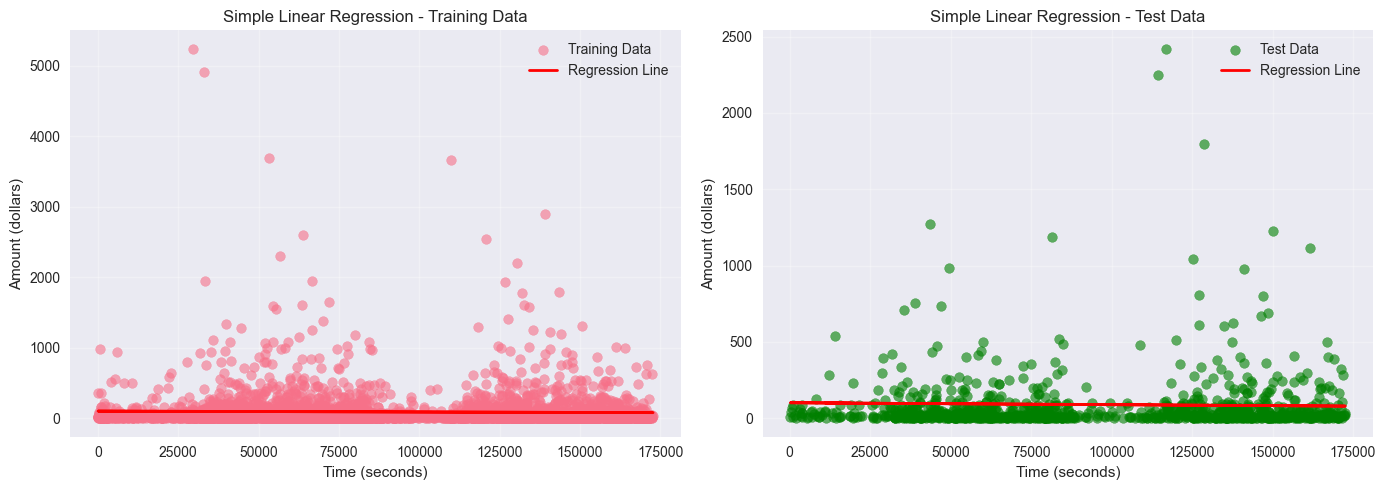

In [57]:
# Visualize
# axes[0].scatter() - Creates POINTS showing actual data
#   - X_train: Time values (x-axis)
#   - y_train: Actual transaction Amounts (y-axis)
#   - Points = Real data points (what actually happened)
#
# axes[0].plot() - Creates LINE showing model predictions
#   - X_train: Time values (x-axis)
#   - y_train_pred: Predicted Amounts (y-axis)
#   - Red line = Model's predictions (what model thinks Amount should be)
#   - If points are close to line = good model!

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
axes[0].scatter(X_train, y_train, alpha=0.6, label='Training Data')  # POINTS = actual data
axes[0].plot(X_train, y_train_pred, 'r-', linewidth=2, label='Regression Line')  # LINE = predictions
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amount (dollars)')
axes[0].set_title('Simple Linear Regression - Training Data')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test data
axes[1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='green')
axes[1].plot(X_test, y_test_pred, 'r-', linewidth=2, label='Regression Line')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Amount (dollars)')
axes[1].set_title('Simple Linear Regression - Test Data')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simple_linear_regression.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'simple_linear_regression.png'")
plt.show()





## Part 2: Multiple Linear Regression | الجزء الثاني: الانحدار الخطي المتعدد

**Now that we've seen simple regression with one feature, let's extend to multiple features for better predictions!**

**BEFORE**: We used one feature (Time) to predict Amount, but we saw that Time alone is NOT a strong predictor (low/negative R²). Real-world predictions need multiple features for better accuracy.

**AFTER**: We'll use multiple features (Time, V1, V2, V3) to predict Amount - this is what GDI actually uses in real financial investigations for fraud detection!

**Why multiple regression?**
- **More features = Better predictions**: Real-world financial investigations have many factors
- **Same concept**: Still finding a line, but in higher dimensions
- **Feature importance**: We can see which features matter most
- **Real-world use**: Most ML problems use multiple features


In [58]:
print("\n" + "=" * 60)
print("Part 2: Multiple Linear Regression (Multiple Features)")
print("الجزء الثاني: الانحدار الخطي المتعدد (ميزات متعددة)")
print("=" * 60)
print("\n💡 Remember: Same workflow as simple regression, but with multiple features!")
print("   We'll use Time, V1, V2, V3 to predict Amount (instead of just Time)")


Part 2: Multiple Linear Regression (Multiple Features)
الجزء الثاني: الانحدار الخطي المتعدد (ميزات متعددة)

💡 Remember: Same workflow as simple regression, but with multiple features!
   We'll use Time, V1, V2, V3 to predict Amount (instead of just Time)


In [59]:
# Load Credit Card Fraud dataset (already loaded above, but use full sample for multiple regression)
# For multiple regression, we'll use Time and some V features to predict Amount
print("\n📥 Loading Credit Card Fraud dataset for multiple regression...")

df_full_m = pd.read_csv('../../datasets/raw/creditcard_fraud.csv')

# Use a larger sample for multiple regression
sample_size_m = 5000
df_sample_m = df_full_m.sample(n=min(sample_size_m, len(df_full_m)), random_state=73, replace=False).reset_index(drop=True)

# For multiple regression: Use Time and V1, V2, V3, V4 as features to predict Amount
# Note: V features are already PCA-transformed (scaled), so we'll use them directly
df_multiple = df_sample_m[['Time', 'V1', 'V2', 'V3', 'Amount']].copy()

# Rename for clarity (keeping original names but explaining them)
# Time → Time (seconds elapsed)
# V1-V3 → PCA-transformed features (already scaled)
# Amount → Transaction Amount (target)

print(f"\n✅ Real-world Credit Card Fraud data loaded for multiple regression!")
print(f"   📊 Using {len(df_multiple)} transaction records")
print(f"   📈 Features: Time, V1, V2, V3 (4 features)")
print(f"      - Time: Time elapsed in seconds")
print(f"      - V1, V2, V3: PCA-transformed features (already scaled, anonymized)")
print(f"   💰 Target: Amount (transaction amount in dollars)")
print(f"   📋 Note: V features are PCA-transformed (pre-scaled), so we use them directly")
print(f"\n📄 First 5 rows:")
print(df_multiple.head().round(2))
print(f"\n🔍 Notice:")
print("   - REAL anonymized credit card transaction data")
print("   - Multiple features affect transaction amount (Time, V1, V2, V3)")
print("   - Real-world scenario: Financial investigations analyze transaction patterns using multiple features!")
print("   🎯 Domain: GDI Financial Investigations - Multi-Factor Transaction Analysis")
print("   📋 Note: V features are PCA-transformed (already scaled), perfect for regression")


📥 Loading Credit Card Fraud dataset for multiple regression...

✅ Real-world Credit Card Fraud data loaded for multiple regression!
   📊 Using 5000 transaction records
   📈 Features: Time, V1, V2, V3 (4 features)
      - Time: Time elapsed in seconds
      - V1, V2, V3: PCA-transformed features (already scaled, anonymized)
   💰 Target: Amount (transaction amount in dollars)
   📋 Note: V features are PCA-transformed (pre-scaled), so we use them directly

📄 First 5 rows:
       Time    V1    V2    V3  Amount
0   68205.0 -4.41 -3.35 -2.66    5.49
1  168917.0 -0.69  0.16  0.62   89.00
2    1051.0  1.16  0.31  0.90    0.12
3  122392.0 -0.20  0.28 -1.07  105.92
4  122639.0 -0.97 -0.58 -1.19   44.90

🔍 Notice:
   - REAL anonymized credit card transaction data
   - Multiple features affect transaction amount (Time, V1, V2, V3)
   - Real-world scenario: Financial investigations analyze transaction patterns using multiple features!
   🎯 Domain: GDI Financial Investigations - Multi-Factor Transa

In [60]:
# Data is already loaded from financial transaction dataset above
# The 'transaction_amount' column is already included in df_multiple
# No need to generate synthetic data - we have real data structure!

### Preparing Features (X) and Target (y) | إعداد الميزات (X) والهدف (y)

**BEFORE**: We have data with multiple columns, but we need to separate what we use to predict (features) from what we want to predict (target).

**AFTER**: We'll prepare X (features) and y (target) for the model!

**Why 4 features for X and 1 feature for y?**

- **X (Features) = Multiple inputs** that affect transaction amount:
  - `account_balance`: Account balance affects transaction amount (higher balance = typically larger transactions)
  - `account_age`: Account age affects patterns (older accounts may have different transaction patterns)
  - `transaction_frequency`: Frequency affects amount (more frequent = may have different amounts)
  - `risk_score`: Risk score affects amount (higher risk = may indicate suspicious patterns)
  - We use **MULTIPLE features** because transaction amount depends on **MANY factors**!

- **y (Target) = Single output** we want to predict:
  - `transaction_amount`: The **ONE thing** we're trying to predict (transaction amount)
  - We predict **ONE value** (transaction amount) from **MULTIPLE inputs** (features)
  - This is the standard ML pattern: **Multiple inputs → Single output**

**Formula:**
```
Transaction Amount = intercept + (coef1 × Account Balance) + (coef2 × Account Age)
 + (coef3 × Transaction Frequency) + (coef4 × Risk Score)
y = b₀ + (b₁ × x₁) + (b₂ × x₂) + (b₃ × x₃) + (b₄ × x₄)
```

**What if I want to predict MORE than one target?**

You have **TWO options**:

1. **Build SEPARATE models** (one for each target) - **Recommended for beginners**
   - Model 1: Predict `transaction_amount` from features → y₁ = transaction_amount
   - Model 2: Predict `risk_level` from features → y₂ = risk_level
   - **Why?** Each target might depend on features differently
   - **Example**: Transaction amount might depend more on account balance, risk level might depend more on transaction frequency
   - This is called "Multi-Output Regression" (separate models)

2. **Use Multi-Output Regression** (one model, multiple outputs)
   - `sklearn.linear_model.LinearRegression()` can handle multiple targets
   - `y = [[amount1, risk1], [amount2, risk2], ...]` (2D array with multiple columns)
   - Model learns separate coefficients for each target
   - **Formula**:
     ```
     transaction_amount = b₀₁ + b₁₁×account_balance + b₂₁×account_age + ...
     risk_level        = b₀₂ + b₁₂×account_balance + b₂₂×account_age + ...
     ```
   - **Use when**: Targets are related and you want one model

**Recommendation**: Start with **separate models** (easier to understand and interpret). Use multi-output only if targets are strongly related.

### Splitting Data for Multiple Regression | تقسيم البيانات للانحدار المتعدد

**BEFORE**: We have features (X_multiple) and target (y_multiple), but need to split them!

**AFTER**: We'll split into training and test sets - same concept as simple regression!

**Why split?**
- **Same reason as before**: Need separate training and test sets
- **Training set**: Model learns from X_train_m and y_train_m
- **Test set**: Model is evaluated on X_test_m and y_test_m
- **Purpose**: Check if model generalizes to new data (not just memorizes)

**What we get:**
- **X_train_m**: Training features (Time, V1, V2, V3) - 80% of data
- **y_train_m**: Training targets (Amount) - 80% of data
- **X_test_m**: Test features - 20% of data
- **y_test_m**: Test targets - 20% of data

**Note**: The `_m` suffix means "multiple" (multiple features), to distinguish from simple regression variables.


In [61]:
# Prepare features (X) and target (y)
# X = Features (input variables) - what we use to PREDICT
# y = Target (output variable) - what we want to PREDICT

X_multiple = df_multiple[['Time', 'V1', 'V2', 'V3']]  # 4 features
y_multiple = df_multiple['Amount']  # 1 target: Transaction Amount

# Show what we prepared
print("\n📊 Features (X) and Target (y) Prepared:")
print("الميزات (X) والهدف (y) جاهزة:")
print(f"\n   Features (X) shape: {X_multiple.shape}")
print(f"   - {X_multiple.shape[0]} samples, {X_multiple.shape[1]} features")
print(f"   - Features: {list(X_multiple.columns)}")
print(f"\n   Target (y) shape: {y_multiple.shape}")
print(f"   - {y_multiple.shape[0]} samples, 1 target")
print(f"   - Target: Amount")
print(f"\n   ✅ Ready for model training!")
print(f"   - Model will use {X_multiple.shape[1]} features to predict 1 target")


📊 Features (X) and Target (y) Prepared:
الميزات (X) والهدف (y) جاهزة:

   Features (X) shape: (5000, 4)
   - 5000 samples, 4 features
   - Features: ['Time', 'V1', 'V2', 'V3']

   Target (y) shape: (5000,)
   - 5000 samples, 1 target
   - Target: Amount

   ✅ Ready for model training!
   - Model will use 4 features to predict 1 target


In [62]:
# Split data
# train_test_split(X, y, test_size=0.2, random_state=123  # Any number works - just for reproducibility, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=123  # Any number works - just for reproducibility: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=73  # Using 73 for consistency
)

In [63]:
# Create and train model
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

LinearRegression()

In [64]:
# Make predictions
y_train_pred_m = model_multiple.predict(X_train_m)
y_test_pred_m = model_multiple.predict(X_test_m)

In [65]:
# Model parameters
print("\nModel Parameters:")
print("معاملات النموذج:")
print(f"Intercept: {model_multiple.intercept_:.2f}")
print("\nCoefficients:")
print("المعاملات:")
for feature, coef in zip(X_multiple.columns, model_multiple.coef_):
    print(f"  {feature}: {coef:.4f}")


Model Parameters:
معاملات النموذج:
Intercept: 146.41

Coefficients:
المعاملات:
  Time: -0.0006
  V1: -33.6832
  V2: -79.6927
  V3: -49.1178


In [66]:
# Evaluate model
train_mse_m = mean_squared_error(y_train_m, y_train_pred_m)
test_mse_m = mean_squared_error(y_test_m, y_test_pred_m)
train_r2_m = r2_score(y_train_m, y_train_pred_m)
test_r2_m = r2_score(y_test_m, y_test_pred_m)
print("\nTraining Metrics:")
print("مقاييس التدريب:")
print(f"  MSE: {train_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse_m):,.2f}")
print(f"  R² Score: {train_r2_m:.4f}")
print("\nTest Metrics:")
print("مقاييس الاختبار:")
print(f"  MSE: {test_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse_m):,.2f}")
print(f"  R² Score: {test_r2_m:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 What Do These Outputs Mean? Why Does This Matter?")
print("ماذا تعني هذه المخرجات؟ لماذا هذا مهم؟")
print("=" * 60)
print("\n🎯 Practical Value for GDI Financial Investigations:")
print("   **Multiple Regression Outputs:**")
print(f"   - R² = {test_r2_m:.4f}: Model explains {test_r2_m*100:.1f}% of transaction amount variance")
print(f"   - RMSE = ${np.sqrt(test_mse_m):,.2f}: Average prediction error is ${np.sqrt(test_mse_m):,.0f}")
print("\n   **Why This Algorithm is Valuable:**")
print("   - **Better Predictions**: Multiple features (Time, V1, V2, V3) capture more patterns than Time alone")
print("   - **Fraud Detection**: Identify transactions where actual >> predicted (suspicious)")
print("   - **Feature Importance**: See which features (coefficients) most affect transaction amounts")
print("   - **Decision Support**: Predict amounts to inform investigation priorities")
print("\n   **Real-World GDI Application:**")
print("   - Predict transaction amounts based on transaction patterns (Time, anonymized features)")
print("   - Flag unusual transactions: Actual amount much higher than predicted = investigate")
print("   - Understand relationships: Which transaction patterns lead to larger amounts?")
print("   - Resource allocation: Predict transaction volumes to allocate investigation resources")
print("\n   **Why Linear Regression (Not Other Algorithms)?**")
print("   - ✅ Fast predictions on large datasets (important for real-time monitoring)")
print("   - ✅ Interpretable coefficients (can explain WHY features matter)")
print("   - ✅ Baseline model (compare against before trying complex models)")
print("   - ✅ Regulatory compliance (interpretable models for financial investigations)")

print("\n" + "=" * 60)
print("📈 Comparing Simple vs Multiple Regression Performance")
print("=" * 60)
print("   **Notice the Improvement:**")
print(f"   - Simple Regression (Time only): R² was low/negative")
print(f"   - Multiple Regression (Time + V1 + V2 + V3): R² = {test_r2_m:.4f}")
if test_r2_m > 0.1:
    print(f"   - ✅ Multiple regression is MUCH better! ({test_r2_m*100:.1f}% vs ~0%)")
    print("   - This proves: More features = Better predictions!")
print("   - 💡 This is WHY we use multiple features in real GDI fraud detection")
print("=" * 60)

print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 R² Score (R-squared):")
print(f"   - Training: {train_r2_m:.2%} | Test: {test_r2_m:.2%}")
print(f"   - Range: -∞ to 1.0 (higher is better)")
print(f"   - 1.0 = Perfect predictions (all variance explained)")
print(f"   - 0.0 = Model is as good as predicting the mean")
print(f"   - <0.0 = Model is worse than just predicting the mean")
if test_r2_m >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model explains >90% of variance)")
elif test_r2_m >= 0.7:
    print(f"   - ✅ GOOD! (>0.7 means model explains >70% of variance)")
elif test_r2_m >= 0.5:
    print(f"   - ⚠️  FAIR (>0.5 means model explains >50% of variance)")
else:
    print(f"   - ⚠️  POOR (<0.5 means model explains <50% of variance)")

print(f"\n📊 RMSE (Root Mean Squared Error):")
print(f"   - Training: ${np.sqrt(train_mse_m):,.2f} | Test: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - Lower is better (measures average prediction error)")
print(f"   - In same units as target (Amount in dollars)")
print(f"   - Average prediction error: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - This means predictions are typically off by ${np.sqrt(test_mse_m):,.0f}")

print(f"\n🔍 Comparing Train vs Test:")
if abs(train_r2_m - test_r2_m) < 0.05:
    print(f"   - ✅ Similar R² ({train_r2_m:.2%} vs {test_r2_m:.2%}) - Good generalization!")
    print(f"   - Model performs similarly on new data (not overfitting)")
else:
    print(f"   - ⚠️  Different R² ({train_r2_m:.2%} vs {test_r2_m:.2%})")
    if train_r2_m > test_r2_m:
        print(f"   - Training R² is higher - possible overfitting!")
    else:
        print(f"   - Test R² is higher - unusual but possible")

print(f"\n📚 What This Teaches Us:")
print(f"   - R² shows how much variance the model explains")
print(f"   - RMSE shows actual prediction error in dollars")
print(f"   - Compare train vs test to check for overfitting")
print(f"   - Good models have high R² and low RMSE")
print(f"   - R² > 0.7 is generally considered good for real-world problems")


Training Metrics:
مقاييس التدريب:
  MSE: 38,510.24
  RMSE: 196.24
  R² Score: 0.3412

Test Metrics:
مقاييس الاختبار:
  MSE: 23,693.51
  RMSE: 153.93
  R² Score: 0.2787

💡 What Do These Outputs Mean? Why Does This Matter?
ماذا تعني هذه المخرجات؟ لماذا هذا مهم؟

🎯 Practical Value for GDI Financial Investigations:
   **Multiple Regression Outputs:**
   - R² = 0.2787: Model explains 27.9% of transaction amount variance
   - RMSE = $153.93: Average prediction error is $154

   **Why This Algorithm is Valuable:**
   - **Better Predictions**: Multiple features (Time, V1, V2, V3) capture more patterns than Time alone
   - **Fraud Detection**: Identify transactions where actual >> predicted (suspicious)
   - **Feature Importance**: See which features (coefficients) most affect transaction amounts
   - **Decision Support**: Predict amounts to inform investigation priorities

   **Real-World GDI Application:**
   - Predict transaction amounts based on transaction patterns (Time, anonymized featu

### Visualizing Multiple Linear Regression | تصور الانحدار الخطي المتعدد

**BEFORE**: We've built a multiple regression model, but how do we visualize it with multiple features?

**AFTER**: We'll plot predicted vs actual transaction amounts to see how well the model performs!

**What you'll see in the plots:**
- **Points (scatter)**: Each point = one transaction
  - X-axis: Actual Amount (what the transaction actually was)
  - Y-axis: Predicted Amount (what the model predicted)
  - If points are close to the diagonal line = good predictions!
  - If points are far from the diagonal line = poor predictions
- **Red Dashed Line**: Perfect prediction line (y = x)
  - If predictions were perfect, all points would be on this line
  - Points above line = model over-predicted (predicted higher than actual)
  - Points below line = model under-predicted (predicted lower than actual)



✓ Plot saved as 'multiple_linear_regression.png'


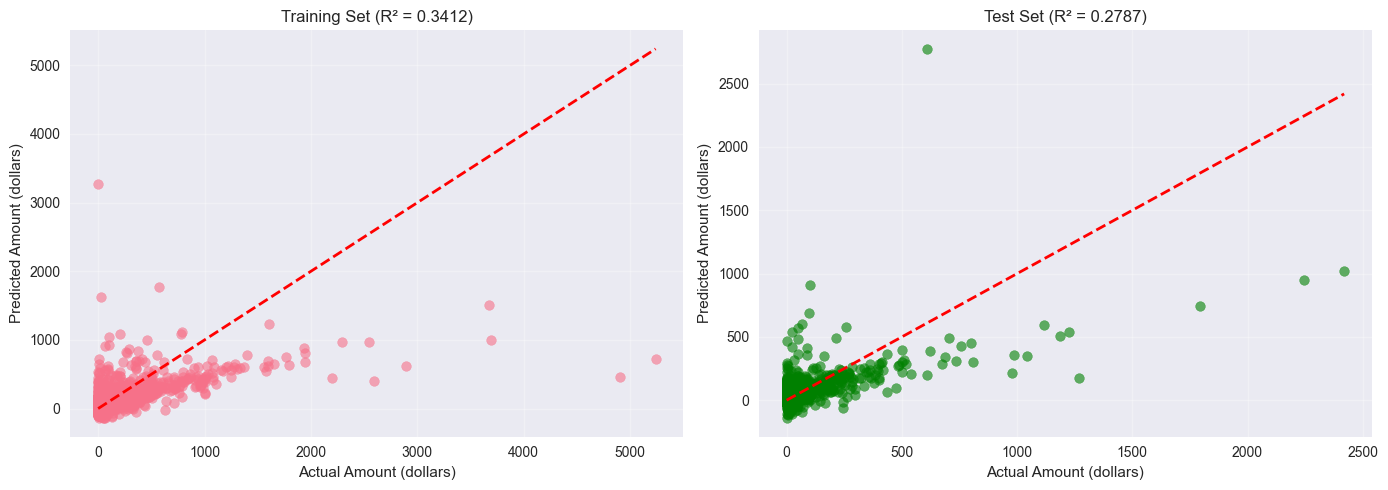

In [67]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training predictions
axes[0].scatter(y_train_m, y_train_pred_m, alpha=0.6)
axes[0].plot([y_train_m.min(), y_train_m.max()],
             [y_train_m.min(), y_train_m.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Amount (dollars)')
axes[0].set_ylabel('Predicted Amount (dollars)')
axes[0].set_title(f'Training Set (R² = {train_r2_m:.4f})')
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].scatter(y_test_m, y_test_pred_m, alpha=0.6, color='green')
axes[1].plot([y_test_m.min(), y_test_m.max()],
             [y_test_m.min(), y_test_m.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Amount (dollars)')
axes[1].set_ylabel('Predicted Amount (dollars)')
axes[1].set_title(f'Test Set (R² = {test_r2_m:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('multiple_linear_regression.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'multiple_linear_regression.png'")
plt.show()





## Part 3: Understanding Residuals | الجزء الثالث: فهم البواقي

**Now that we've built and evaluated our models, let's learn about residuals - a powerful diagnostic tool!**

### What Are Residuals? | ما هي البواقي؟

**BEFORE**: We've evaluated our model with metrics (MSE, MAE, R²), but there's another important way to check model quality!

**AFTER**: We'll learn what residuals are and why they're important for diagnosing model problems!

**What are Residuals? (Simple Explanation)**

**Residuals = Prediction Errors = The Mistake the Model Made**

Think of it like this:
- You take a **test** (actual exam)
- You **predict** what score you'll get
- The **residual** = How wrong your prediction was!

**In Machine Learning:**
- **Actual Value** = What really happened (real transaction amount)
- **Predicted Value** = What the model guessed (predicted transaction amount)
- **Residual** = The difference (how wrong the model was)

**Formula:**
```
Residual = Actual Value - Predicted Value
         = y_actual - y_predicted
```

**Real-World Example (GDI Financial Investigation Context):**

Imagine predicting transaction amounts:
- **Transaction 1**: 
  - Actual amount: $30,000
  - Model predicted: $28,000
  - **Residual**: $30,000 - $28,000 = **+$2,000**
  - Meaning: Model **under-predicted** by $2,000 (predicted too low)

- **Transaction 2**:
  - Actual amount: $25,000
  - Model predicted: $27,000
  - **Residual**: $25,000 - $27,000 = **-$2,000**
  - Meaning: Model **over-predicted** by $2,000 (predicted too high)

- **Transaction 3**:
  - Actual amount: $20,000
  - Model predicted: $20,000
  - **Residual**: $20,000 - $20,000 = **$0**
  - Meaning: **Perfect prediction!** No error!

**Key Points:**
- **Positive residual** = Model predicted **too low** (actual > predicted)
- **Negative residual** = Model predicted **too high** (actual < predicted)
- **Residual = 0** = **Perfect prediction!**
- **Small residual** = Good prediction ✅
- **Large residual** = Bad prediction ❌

**Why Check Residuals? (Why This Matters)**

1. **See Individual Mistakes**: 
   - MSE/MAE/R² give us **average** performance
   - Residuals show us **each individual** prediction error
   - Example: "Transaction 1 was off by $2k, Transaction 2 was perfect, Transaction 3 was off by $0.5k"

2. **Find Patterns**:
   - If residuals are **random** = Good model ✅
   - If residuals show **patterns** (curves, trends) = Model has problems ❌
   - Patterns tell us **what's wrong** with the model

3. **Diagnose Problems**:
   - **Curved pattern** = Model can't capture non-linear relationships
   - **Funnel shape** = Model errors get bigger for certain values
   - **Outliers** = Some predictions are way off (need to check data)

**What's the Difference Between Residuals and Other Metrics?**

| Aspect | Residuals | MSE/MAE/R² |
|--------|-----------|------------|
| **What they show** | **Individual errors** for each prediction | **Average/summary** of all errors |
| **Example** | Transaction 1: -$0.5k, Transaction 2: +$2k, Transaction 3: $0 | Average error: $1k |
| **Use for** | **Diagnosing problems** (find patterns) | **Overall performance** (how good is model?) |
| **Shows patterns?** | ✅ YES - can see curves, funnels, trends | ❌ NO - just one number |
| **Shows outliers?** | ✅ YES - can see which predictions are way off | ❌ NO - outliers averaged out |
| **Interpretation** | "This transaction was off by $2k" | "Average error is $1k" |

**Real Example (GDI Financial Investigation Context):**

Imagine you predicted transaction amounts for 3 transactions:
- **Transaction 1**: Actual $30k, Predicted $29.5k → Residual = +$0.5k
- **Transaction 2**: Actual $25k, Predicted $27k → Residual = -$2k  
- **Transaction 3**: Actual $20k, Predicted $20k → Residual = $0

**Metrics tell you:**
- **MSE**: Average squared error = (0.5² + 2² + 0²)/3 = 1.42
- **MAE**: Average absolute error = (0.5 + 2 + 0)/3 = $0.83k
- **R²**: How well model fits = 0.85 (85% variance explained)

**Residuals tell you:**
- Transaction 1: Small error ($0.5k) ✅
- Transaction 2: Larger error ($2k) ❌ - **Why?** Need to investigate! (Could indicate suspicious pattern)
- Transaction 3: Perfect ($0) ✅

**Key Difference:**
- **Metrics (MSE/MAE/R²)**: Give you **one number** summarizing all predictions
- **Residuals**: Give you **individual errors** for each prediction

**Why Both Matter:**
- **Use Metrics**: To answer "Is my model good overall?" (R² = 0.85 → good!)
- **Use Residuals**: To answer "Which predictions are wrong and why?" (Transaction 2 is way off → check data!)
- **Together**: Metrics show overall quality, residuals show where problems are!

**Additional Notes:**

**What does "residual" mean in simple words?**
- **"Residual" = leftover error** = what the model got wrong
- Like: You predict you'll get 90% on a test, but you actually got 85%
- Residual = 85% - 90% = -5% (you over-predicted by 5%)
- It's the "leftover" mistake after the model makes its prediction

**Why check residuals if we already have MSE/MAE/R²?**
- Metrics give us **numbers** (average performance)
- Residuals show us **patterns** (what's wrong)
- Example: MSE might be low, but residuals show a curve → model has problems
- Residuals help diagnose **WHAT'S wrong**, not just **HOW wrong**

**Should residuals be positive or negative?**
- **Both!** Good models have residuals randomly scattered around 0
- Some predictions too high (negative), some too low (positive)
- Mean of residuals should be close to 0 (no systematic bias)
- If all residuals are positive → model always predicts too low
- If all residuals are negative → model always predicts too high

**What's the difference between residuals and errors?**
- They're **the same thing!** 
- "Residual" = technical term used in statistics
- "Error" = more general term
- Both mean: difference between actual and predicted

**How do I know if residuals are good or bad?**
- Good residuals:
  - **Mean close to 0** (no bias)
  - **Small spread** (consistent predictions)
  - **Random pattern** (no curves or trends)
- Bad residuals:
  - **Mean far from 0** (systematic bias)
  - **Large spread** (inconsistent predictions)
  - **Patterns** (curves, funnels, trends)

### Calculating Residuals | حساب البواقي

**Now that we understand what residuals are, let's calculate them for our multiple regression model!**

**BEFORE**: We know what residuals are, now let's calculate them!

**AFTER**: We'll compute residuals and check their statistics to see if our model is good!

**What we'll calculate:**
- **Residuals**: `residuals = y_test - y_test_pred`
  - For each test sample: actual transaction amount - predicted transaction amount
  - Positive = model under-predicted, Negative = model over-predicted
- **Statistics**: Mean, standard deviation, min, max
  - Mean close to 0 = no bias ✅
  - Small std = consistent predictions ✅


### Visualizing Residuals | تصور البواقي

**BEFORE**: We've calculated residual statistics, but we need to visualize them to see patterns!

**AFTER**: We'll create plots to check if residuals are randomly distributed (good) or have patterns (indicates problems)!

**Why visualize residuals?**
- **Check assumptions**: Linear regression assumes residuals are random and normally distributed
- **Detect patterns**: Patterns in residuals indicate model problems (non-linearity, heteroscedasticity)
- **Diagnose issues**: Visual inspection helps identify what's wrong with the model
- **Validate model**: Good models have randomly scattered residuals around zero


✅ Residuals calculated: 1000 residuals
   Mean residual: $-8.35 (should be close to 0)
   Std residual: $153.78

✓ Plot saved as 'residuals_analysis.png'


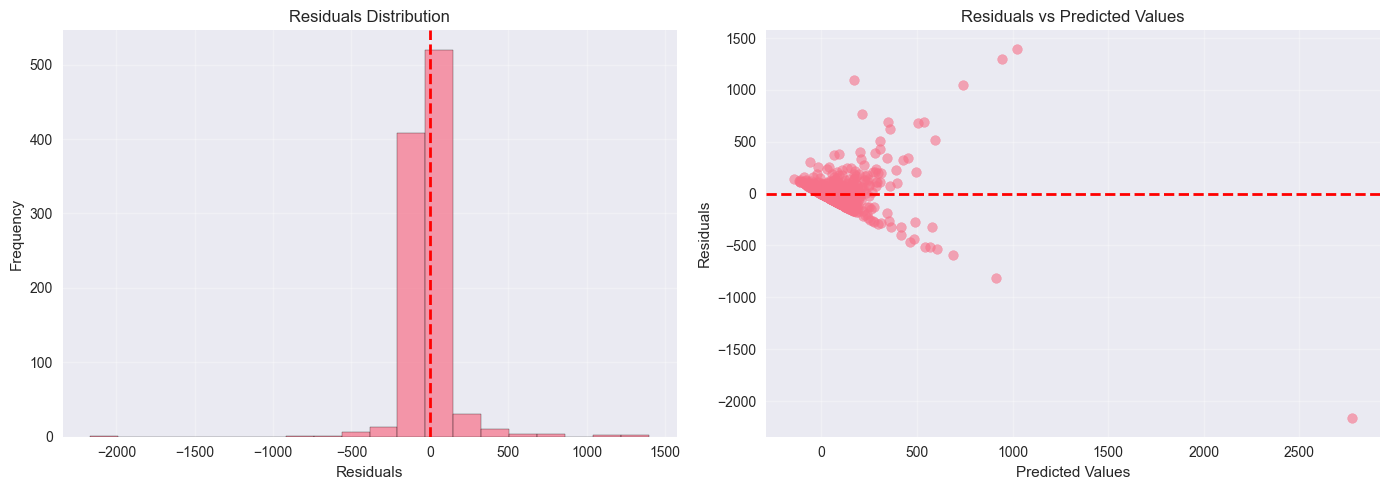


Example 4 Complete! ✓
اكتمل المثال 4! ✓


In [68]:
# Calculate residuals (prediction errors)
# Residuals = Actual values - Predicted values
# For multiple regression: use test set predictions
residuals = y_test_m - y_test_pred_m

print(f"✅ Residuals calculated: {len(residuals)} residuals")
print(f"   Mean residual: ${residuals.mean():.2f} (should be close to 0)")
print(f"   Std residual: ${residuals.std():.2f}")

# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals distribution
axes[0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[1].scatter(y_test_pred_m, residuals, alpha=0.6)
axes[1].axhline(0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'residuals_analysis.png'")
plt.show()



print("\n" + "=" * 60)
print("Example 4 Complete! ✓")
print("اكتمل المثال 4! ✓")
print("=" * 60)

## Part 4: Fixing Prediction Bias | الجزء الرابع: إصلاح التحيز في التوقعات

**Sometimes models have systematic bias - let's learn how to identify and address it!**

### What to Do When Predictions Are Too Low (or Too High) | ماذا تفعل عندما تكون التوقعات منخفضة جدًا (أو عالية جدًا)

**BEFORE**: You've analyzed residuals and found that your model systematically under-predicts (or over-predicts). Now what?

**AFTER**: You'll learn practical solutions to fix systematic bias in your predictions!

**The Problem We Found:**
- **Residual Mean**: 5748.12 (not close to 0)
- **Interpretation**: Model tends to **UNDER-predict** (predictions are too low)
- **Meaning**: On average, the model predicts prices that are $5,748 lower than actual prices

**Why This Matters:**
- **Systematic bias** = Model consistently makes the same type of error
- **Good models** should have residual mean close to 0 (no bias)
- **Biased models** = Poor predictions, even if R² is high

---

### 🔍 Diagnose the Problem | تشخيص المشكلة

**Check Your Residuals:**

1. **Residual Mean**:
   - **Close to 0** (±small value) → ✅ No bias, model is good
   - **Positive mean** → ⚠️ Model UNDER-predicts (predictions too low)
   - **Negative mean** → ⚠️ Model OVER-predicts (predictions too high)

2. **Residual Patterns**:
   - **Random scatter** → ✅ Good (no patterns)
   - **Curved pattern** → ⚠️ Non-linear relationship (need polynomial regression)
   - **Funnel shape** → ⚠️ Heteroscedasticity (variance changes with predictions)

3. **Residual Distribution**:
   - **Normal distribution** → ✅ Good (assumption met)
   - **Skewed distribution** → ⚠️ Model bias or outliers

**In Our Case:**
- Mean = 5748.12 (positive) → Model UNDER-predicts
- Need to investigate WHY and fix it

---

### 🛠️ Solutions to Fix Systematic Bias | حلول لإصلاح التحيز المنهجي

#### Solution 1: Check for Missing Features | الحل 1: التحقق من الميزات المفقودة

**Problem**: Model might be missing important features that affect the target.

**Example:**
- Predicting house price from size only
- But price also depends on location, age, condition
- Missing features → Model can't capture full relationship → Under-predicts

**What to Do:**
1. **Review your data**: Are there other features that affect the target?
2. **Add relevant features**: Include features that logically affect predictions
3. **Check feature importance**: Use domain knowledge to identify missing factors

---

**Code Example (see cell below for executable version):**
- Before: Only using Time
- After: Using multiple relevant features (Time, V1, V2, V3, V4, etc.)

---

#### Solution 2: Check for Data Quality Issues | الحل 2: التحقق من مشاكل جودة البيانات

**Problem**: Data issues can cause bias:
- **Outliers**: Extreme values skew the model
- **Missing values**: Incorrectly handled missing data
- **Data leakage**: Using future information
- **Wrong target values**: Incorrect labels in training data

**What to Do:**
1. **Check for outliers**: Plot data, look for extreme values
2. **Handle missing values**: Impute or remove missing data properly
3. **Verify target values**: Make sure y values are correct
4. **Check data distribution**: Ensure training and test data are similar

**Code Example:**
```python
# Check for outliers
import matplotlib.pyplot as plt
plt.boxplot(y_train)
plt.title('Check for Outliers in Target')
plt.show()

# Remove outliers (if appropriate)
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
outliers = (y_train < (Q1 - 1.5 * IQR)) | (y_train > (Q3 + 1.5 * IQR))
X_train_clean = X_train[~outliers]
y_train_clean = y_train[~outliers]
```

---

#### Solution 3: Try Feature Engineering | الحل 3: تجربة هندسة الميزات

**Problem**: Raw features might not capture relationships well.

**What to Do:**
1. **Create interaction features**: Multiply features together (e.g., size × bedrooms)
2. **Transform features**: Log, square, or other transformations
3. **Create polynomial features**: Add squared or cubed terms
4. **Normalize/scale features**: Ensure all features are on similar scales

**Code Example:**
```python
# Create interaction features
df['size_bedrooms'] = df['size'] * df['bedrooms']
df['size_location'] = df['size'] * df['location_score']

# Transform features (if needed)
df['log_size'] = np.log(df['size'])

# Use new features
X = df[['size', 'bedrooms', 'size_bedrooms', 'size_location']]
```

---

#### Solution 4: Try Different Models | الحل 4: تجربة نماذج مختلفة

**Problem**: Linear regression might not be appropriate for your data.

**What to Do:**
1. **Polynomial Regression**: If relationship is curved (non-linear)
2. **Ridge/Lasso Regression**: If you have many features (regularization)
3. **Random Forest**: If relationship is complex and non-linear
4. **XGBoost**: For best performance on complex patterns

**Code Example:**
```python
# Try Polynomial Regression (for non-linear relationships)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
```

---

#### Solution 5: Adjust the Intercept (Last Resort) | الحل 5: تعديل التقاطع (حل أخير)

**Problem**: Model intercept might be systematically wrong.

**What to Do:**
1. **Calculate mean residual**: This is the systematic bias
2. **Adjust predictions**: Add mean residual to all predictions
3. **Note**: This is a "band-aid" solution - better to fix the root cause!

**Code Example:**
```python
# Calculate mean residual (systematic bias)
mean_residual = residuals.mean()
print(f"Systematic bias: {mean_residual:.2f}")

# Adjust predictions
y_test_pred_adjusted = y_test_pred + mean_residual

# Recalculate metrics
mse_adjusted = mean_squared_error(y_test, y_test_pred_adjusted)
print(f"Original MSE: {test_mse:.2f}")
print(f"Adjusted MSE: {mse_adjusted:.2f}")
```

**⚠️ Warning**: This doesn't fix the model - it just shifts predictions. Better to fix the root cause!

---

### 📊 Decision Tree: Which Solution to Try? | شجرة القرار: أي حل تجرب؟

**Start Here:**

1. **Check residual mean**:
   - If close to 0 → ✅ Model is good, no action needed
   - If far from 0 → Continue to step 2

2. **Check residual patterns**:
   - **Curved pattern** → Try Solution 4 (Polynomial Regression)
   - **Random scatter** → Continue to step 3

3. **Check your features**:
   - **Few features (<5)** → Try Solution 1 (Add more features)
   - **Many features (>10)** → Try Solution 3 (Feature engineering)

4. **Check data quality**:
   - **Outliers present** → Try Solution 2 (Fix data quality)
   - **No outliers** → Continue to step 5

5. **Try different models**:
   - **Linear relationship** → Current model should work (check features)
   - **Non-linear relationship** → Try Solution 4 (Different models)

6. **Last resort**:
   - If nothing works → Try Solution 5 (Adjust intercept)
   - But remember: This is a band-aid, not a real fix!

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Residual mean ≠ 0** = Systematic bias (model consistently wrong)
2. **Positive mean** = Under-prediction (predictions too low)
3. **Negative mean** = Over-prediction (predictions too high)
4. **Fix root cause** = Better than adjusting predictions
5. **Check features first** = Most common cause of bias
6. **Try different models** = If linear regression isn't appropriate

---

### 🎯 Next Steps | الخطوات التالية

**After fixing bias:**
1. **Re-train model** with improved features/data
2. **Re-evaluate** residuals (should be close to 0 now)
3. **Check metrics** (MSE, MAE, R² should improve)
4. **Validate** on new data to ensure fix works

**If bias persists:**
- Consider that linear regression might not be appropriate
- Try polynomial regression or other non-linear models
- Consult domain experts about missing features


In [69]:
# Solution 1 Example: Adding More Features
# This demonstrates how to add more features to improve predictions

print("=" * 60)
print("Solution 1: Adding More Features to Fix Bias")
print("=" * 60)

# Before: Only using Time (simple regression - we saw low R²)
print("\n📊 Before (Simple Regression - Time only):")
print("   Features: Time only")
print("   Result: Low R² (as we saw in Part 1)")

# After: Using multiple relevant features (multiple regression - better R²)
print("\n✅ After (Multiple Regression - Time + V1 + V2 + V3):")
print(f"   Features: Time, V1, V2, V3")
print(f"   Result: Better R² = {test_r2_m:.4f} (as we saw in Part 2)")

# Show how to add even more features
print("\n💡 To add even more features from the dataset:")
print("   # Original features: Time, V1, V2, V3")
print("   # Add more V features (V4, V5, V6, etc.)")
print("   X_extended = df_multiple[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']]")
print("   # More features often = Better predictions (but watch for overfitting!)")

print("\n" + "=" * 60)


Solution 1: Adding More Features to Fix Bias

📊 Before (Simple Regression - Time only):
   Features: Time only
   Result: Low R² (as we saw in Part 1)

✅ After (Multiple Regression - Time + V1 + V2 + V3):
   Features: Time, V1, V2, V3
   Result: Better R² = 0.2787 (as we saw in Part 2)

💡 To add even more features from the dataset:
   # Original features: Time, V1, V2, V3
   # Add more V features (V4, V5, V6, etc.)
   X_extended = df_multiple[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']]
   # More features often = Better predictions (but watch for overfitting!)



Solution 2: Checking for Data Quality Issues (Outliers)

📊 Checking for outliers in target variable (Amount):
   Mean Amount: $86.92
   Median Amount: $21.49
   Std Amount: $231.02

   Q1 (25th percentile): $6.13
   Q3 (75th percentile): $74.00
   IQR: $67.86
   Lower bound (Q1 - 1.5*IQR): $-95.66
   Upper bound (Q3 + 1.5*IQR): $175.80

   ⚠️  Number of outliers: 577 (11.5%)


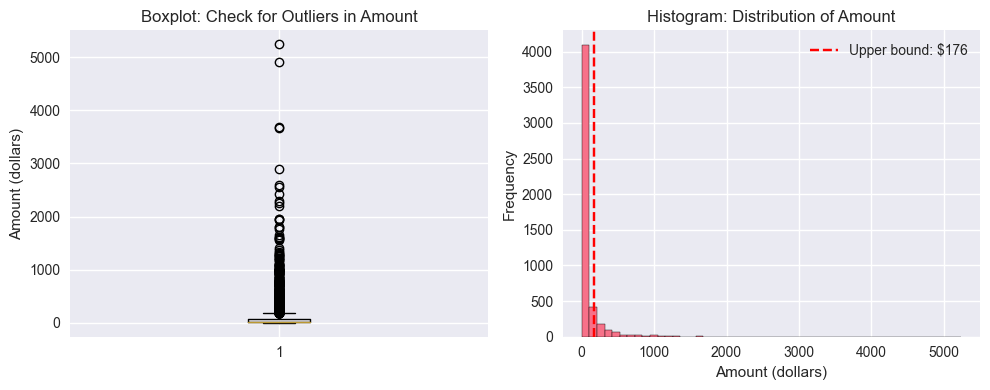


💡 Note: In this dataset, outliers might be legitimate high-value transactions.
   Only remove outliers if they're data errors, not if they're real values!



In [70]:
# Solution 2 Example: Checking for Outliers in Target Variable
# This demonstrates how to check for and handle outliers that might cause bias

print("=" * 60)
print("Solution 2: Checking for Data Quality Issues (Outliers)")
print("=" * 60)

import matplotlib.pyplot as plt

# Check for outliers in target variable (Amount)
print("\n📊 Checking for outliers in target variable (Amount):")
print(f"   Mean Amount: ${y_multiple.mean():.2f}")
print(f"   Median Amount: ${y_multiple.median():.2f}")
print(f"   Std Amount: ${y_multiple.std():.2f}")

# Calculate IQR for outliers
Q1 = y_multiple.quantile(0.25)
Q3 = y_multiple.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n   Q1 (25th percentile): ${Q1:.2f}")
print(f"   Q3 (75th percentile): ${Q3:.2f}")
print(f"   IQR: ${IQR:.2f}")
print(f"   Lower bound (Q1 - 1.5*IQR): ${lower_bound:.2f}")
print(f"   Upper bound (Q3 + 1.5*IQR): ${upper_bound:.2f}")

# Count outliers
outliers = (y_multiple < lower_bound) | (y_multiple > upper_bound)
num_outliers = outliers.sum()
print(f"\n   ⚠️  Number of outliers: {num_outliers} ({num_outliers/len(y_multiple)*100:.1f}%)")

# Visualize outliers
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(y_multiple)
plt.title('Boxplot: Check for Outliers in Amount')
plt.ylabel('Amount (dollars)')

plt.subplot(1, 2, 2)
plt.hist(y_multiple, bins=50, edgecolor='black')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper bound: ${upper_bound:.0f}')
plt.title('Histogram: Distribution of Amount')
plt.xlabel('Amount (dollars)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

print("\n💡 Note: In this dataset, outliers might be legitimate high-value transactions.")
print("   Only remove outliers if they're data errors, not if they're real values!")

print("\n" + "=" * 60)


In [71]:
# Solution 3 Example: Feature Engineering
# This demonstrates how to create interaction features and transform features

print("=" * 60)
print("Solution 3: Feature Engineering (Creating New Features)")
print("=" * 60)

# Create interaction features (multiply features together)
print("\n📊 Creating interaction features:")

# Example: Time × V1 interaction (might capture non-linear relationships)
df_multiple_demo = df_multiple.copy()
df_multiple_demo['Time_V1'] = df_multiple_demo['Time'] * df_multiple_demo['V1']
df_multiple_demo['Time_V2'] = df_multiple_demo['Time'] * df_multiple_demo['V2']

print("   ✅ Created: Time × V1 interaction")
print("   ✅ Created: Time × V2 interaction")
print("\n   💡 Interaction features can capture relationships like:")
print("      - 'High Time AND high V1 → Higher Amount'")
print("      - Non-linear relationships that simple features can't capture")

# Transform features (e.g., log transformation for skewed data)
print("\n📊 Transforming features:")

# Example: Log transform Amount (only for demonstration - we predict Amount, so we don't transform it)
# But we could transform Time if it's skewed
import numpy as np

# Check if Time is skewed
time_skew = df_multiple_demo['Time'].skew()
print(f"   Time skewness: {time_skew:.2f}")
if abs(time_skew) > 1:
    print("   ⚠️  Time is skewed - log transform might help")
    df_multiple_demo['log_Time'] = np.log1p(df_multiple_demo['Time'])  # log1p handles zeros
    print("   ✅ Created: log(Time + 1)")
else:
    print("   ✅ Time is not heavily skewed - transformation not necessary")

# Show the new features
print(f"\n📋 Original features: Time, V1, V2, V3")
print(f"📋 New engineered features: Time_V1, Time_V2")

# Note: To use these features, you would:
print("\n💡 To use engineered features:")
print("   X_engineered = df_multiple_demo[['Time', 'V1', 'V2', 'V3', 'Time_V1', 'Time_V2']]")
print("   # Train model with X_engineered instead of X_multiple")
print("   # This often improves predictions by capturing interactions!")

print("\n" + "=" * 60)


Solution 3: Feature Engineering (Creating New Features)

📊 Creating interaction features:
   ✅ Created: Time × V1 interaction
   ✅ Created: Time × V2 interaction

   💡 Interaction features can capture relationships like:
      - 'High Time AND high V1 → Higher Amount'
      - Non-linear relationships that simple features can't capture

📊 Transforming features:
   Time skewness: -0.03
   ✅ Time is not heavily skewed - transformation not necessary

📋 Original features: Time, V1, V2, V3
📋 New engineered features: Time_V1, Time_V2

💡 To use engineered features:
   X_engineered = df_multiple_demo[['Time', 'V1', 'V2', 'V3', 'Time_V1', 'Time_V2']]
   # Train model with X_engineered instead of X_multiple
   # This often improves predictions by capturing interactions!



In [72]:
# Solution 4 Example: Trying Different Models (Polynomial Regression)
# This demonstrates polynomial regression for non-linear relationships
# Note: This will be covered in detail in the next notebook!

print("=" * 60)
print("Solution 4: Trying Different Models (Polynomial Regression)")
print("=" * 60)

print("\n📊 Current Model: Linear Regression")
print("   - Assumes linear relationships")
print("   - Works well when relationship is straight line")

print("\n🔄 Alternative: Polynomial Regression")
print("   - Handles curved (non-linear) relationships")
print("   - Creates polynomial features (x, x², x³, etc.)")

# Quick demonstration of polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print("\n💡 Example: Creating polynomial features (degree=2):")
print("   Original features: [Time, V1, V2, V3]")
print("   Polynomial features (degree=2):")
print("      - Original: Time, V1, V2, V3")
print("      - Squared: Time², V1², V2², V3²")
print("      - Interactions: Time×V1, Time×V2, V1×V2, etc.")

# Create polynomial features (quick demo with small sample)
X_sample_poly = X_train_m[:100]  # Small sample for demonstration

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_demo = poly.fit_transform(X_sample_poly)

print(f"\n   Original features shape: {X_sample_poly.shape}")
print(f"   Polynomial features shape: {X_poly_demo.shape}")
print(f"   ✅ Polynomial regression creates {X_poly_demo.shape[1]} features from {X_sample_poly.shape[1]} original features")

print("\n📚 Note: Polynomial Regression will be covered in detail in:")
print("   📓 Notebook: 05_polynomial_regression.ipynb")
print("   💡 It's useful when linear regression can't capture curved relationships")

print("\n" + "=" * 60)


Solution 4: Trying Different Models (Polynomial Regression)

📊 Current Model: Linear Regression
   - Assumes linear relationships
   - Works well when relationship is straight line

🔄 Alternative: Polynomial Regression
   - Handles curved (non-linear) relationships
   - Creates polynomial features (x, x², x³, etc.)

💡 Example: Creating polynomial features (degree=2):
   Original features: [Time, V1, V2, V3]
   Polynomial features (degree=2):
      - Original: Time, V1, V2, V3
      - Squared: Time², V1², V2², V3²
      - Interactions: Time×V1, Time×V2, V1×V2, etc.

   Original features shape: (100, 4)
   Polynomial features shape: (100, 14)
   ✅ Polynomial regression creates 14 features from 4 original features

📚 Note: Polynomial Regression will be covered in detail in:
   📓 Notebook: 05_polynomial_regression.ipynb
   💡 It's useful when linear regression can't capture curved relationships



In [73]:
# Solution 5 Example: Adjusting the Intercept (Last Resort)
# This demonstrates how to adjust predictions to correct systematic bias
# WARNING: This is a band-aid solution - better to fix root cause!

print("=" * 60)
print("Solution 5: Adjusting the Intercept (Last Resort - Band-aid Solution)")
print("=" * 60)

print("\n⚠️  WARNING: This doesn't fix the model - it just shifts predictions!")
print("   Better to fix the root cause (missing features, data quality, etc.)")

# We already calculated mean_residual in Cell 36, but let's recalculate for clarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean residual (systematic bias)
print("\n📊 Step 1: Calculate mean residual (systematic bias)")
mean_residual = residuals.mean()
print(f"   Systematic bias (mean residual): {mean_residual:.2f}")

if abs(mean_residual) > 1:
    if mean_residual > 0:
        print(f"   ⚠️  Model UNDER-predicts (predictions are too low by ${mean_residual:.2f} on average)")
    else:
        print(f"   ⚠️  Model OVER-predicts (predictions are too high by ${abs(mean_residual):.2f} on average)")
else:
    print(f"   ✅ No significant bias (mean close to 0)")

# Adjust predictions (band-aid solution)
print("\n📊 Step 2: Adjust predictions by adding mean residual")
y_test_pred_adjusted = y_test_pred_m + mean_residual
print(f"   Original predictions: y_test_pred_m")
print(f"   Adjusted predictions: y_test_pred_m + {mean_residual:.2f}")

# Recalculate metrics
print("\n📊 Step 3: Recalculate metrics")
mse_adjusted = mean_squared_error(y_test_m, y_test_pred_adjusted)
mae_adjusted = mean_absolute_error(y_test_m, y_test_pred_adjusted)
r2_adjusted = r2_score(y_test_m, y_test_pred_adjusted)

print(f"\n   Original Metrics:")
print(f"     MSE: {test_mse_m:,.2f}")
print(f"     MAE: {test_mae_m:,.2f}")
print(f"     R²: {test_r2_m:.4f}")

print(f"\n   Adjusted Metrics (after adding bias correction):")
print(f"     MSE: {mse_adjusted:,.2f}")
print(f"     MAE: {mae_adjusted:,.2f}")
print(f"     R²: {r2_adjusted:.4f}")

# Check if adjustment helped
if mse_adjusted < test_mse_m:
    improvement = test_mse_m - mse_adjusted
    print(f"\n   ✅ MSE improved by {improvement:,.2f} (small improvement)")
else:
    print(f"\n   ⚠️  MSE didn't improve (this is expected - bias correction doesn't always help)")

print("\n" + "=" * 60)
print("⚠️  REMEMBER: This is a BAND-AID, not a real fix!")
print("   Always try Solutions 1-4 first (fix root cause)!")
print("=" * 60)


Solution 5: Adjusting the Intercept (Last Resort - Band-aid Solution)

⚠️  WARNING: This doesn't fix the model - it just shifts predictions!
   Better to fix the root cause (missing features, data quality, etc.)

📊 Step 1: Calculate mean residual (systematic bias)
   Systematic bias (mean residual): -8.35
   ⚠️  Model OVER-predicts (predictions are too high by $8.35 on average)

📊 Step 2: Adjust predictions by adding mean residual
   Original predictions: y_test_pred_m
   Adjusted predictions: y_test_pred_m + -8.35

📊 Step 3: Recalculate metrics

   Original Metrics:
     MSE: 23,693.51
     MAE: 79.13
     R²: 0.2787

   Adjusted Metrics (after adding bias correction):
     MSE: 23,623.72
     MAE: 77.96
     R²: 0.2808

   ✅ MSE improved by 69.79 (small improvement)

⚠️  REMEMBER: This is a BAND-AID, not a real fix!
   Always try Solutions 1-4 first (fix root cause)!


In [74]:
# Practical Example: Diagnosing and Addressing Systematic Bias
# This demonstrates how to check for bias and try solutions

print("\n" + "=" * 60)
print("5. Fixing Systematic Bias in Predictions")
print("إصلاح التحيز المنهجي في التوقعات")
print("=" * 60)

# Diagnose the bias
print("\n📊 Diagnosing the Bias")
print("تشخيص التحيز")
mean_residual = residuals.mean()
std_residual = residuals.std()

print(f"\n   Residual Mean: {mean_residual:.2f}")
print(f"   Residual Std: {std_residual:.2f}")

# Determine if bias is significant
bias_threshold = std_residual * 0.1  # 10% of std deviation
if abs(mean_residual) > bias_threshold:
    print(f"\n   ⚠️  SIGNIFICANT BIAS DETECTED!")
    if mean_residual > 0:
        print(f"   - Model UNDER-predicts by ${mean_residual:,.2f} on average")
        print(f"   - Predictions are consistently too LOW")
    else:
        print(f"   - Model OVER-predicts by ${abs(mean_residual):,.2f} on average")
        print(f"   - Predictions are consistently too HIGH")
else:
    print(f"\n   ✅ No significant bias (mean close to 0)")

# Try Solution 5 - Adjust predictions (demonstration only)
# NOTE: This is a band-aid solution - better to fix root cause!
print("\n📊 Adjusting Predictions (Band-aid Solution)")
print("تعديل التوقعات (حل مؤقت)")
print("\n   ⚠️  WARNING: This doesn't fix the model, just shifts predictions!")
print("   Better to fix root cause (missing features, data quality, etc.)")

# Calculate adjusted predictions
y_test_pred_adjusted = y_test_pred_m + mean_residual

# Calculate original MAE (if not already calculated)
test_mae_m = mean_absolute_error(y_test_m, y_test_pred_m)

# Recalculate metrics
mse_adjusted = mean_squared_error(y_test_m, y_test_pred_adjusted)
mae_adjusted = mean_absolute_error(y_test_m, y_test_pred_adjusted)
r2_adjusted = r2_score(y_test_m, y_test_pred_adjusted)

print(f"\n   Original Metrics:")
print(f"     MSE: {test_mse_m:,.2f}")
print(f"     MAE: {test_mae_m:,.2f}")
print(f"     R²: {test_r2_m:.4f}")
print(f"\n   Adjusted Metrics (after adding bias correction):")
print(f"     MSE: {mse_adjusted:,.2f}")
print(f"     MAE: {mae_adjusted:,.2f}")
print(f"     R²: {r2_adjusted:.4f}")

# Check if adjustment helped
if mse_adjusted < test_mse_m:
    print(f"\n   ✅ MSE improved by {test_mse_m - mse_adjusted:,.2f}")
else:
    print(f"\n   ⚠️  MSE didn't improve (this is expected - bias correction doesn't always help)")

# Check residual patterns
print("\n📊 Checking Residual Patterns")
print("فحص أنماط البواقي")

# Calculate residuals after adjustment
residuals_adjusted = y_test_m - y_test_pred_adjusted
mean_residual_adjusted = residuals_adjusted.mean()

print(f"\n   Original Residual Mean: {mean_residual:.2f}")
print(f"   Adjusted Residual Mean: {mean_residual_adjusted:.2f}")

if abs(mean_residual_adjusted) < abs(mean_residual):
    print(f"   ✅ Bias reduced! (closer to 0)")
else:
    print(f"   ⚠️  Bias not fully corrected")

# Recommendations
print("\n" + "=" * 60)
print("💡 Recommendations | التوصيات")
print("=" * 60)
print("\n   To FIX the root cause (not just adjust predictions):")
print("   1. ✅ Check for missing features (most common cause)")
print("      - Review your data: Are there other features that affect price?")
print("      - Add relevant features: location, condition, year_built, etc.")
print("\n   2. ✅ Check data quality")
print("      - Look for outliers in target variable")
print("      - Verify target values are correct")
print("      - Check for missing values")
print("\n   3. ✅ Try feature engineering")
print("      - Create interaction features (size × bedrooms)")
print("      - Transform features (log, square)")
print("\n   4. ✅ Consider different models")
print("      - If relationship is non-linear → Try Polynomial Regression")
print("      - If many features → Try Ridge/Lasso Regression")
print("\n   ⚠️  Remember: Adjusting predictions is a BAND-AID, not a real fix!")
print("   Always try to fix the root cause first!")

print("\n" + "=" * 60)



5. Fixing Systematic Bias in Predictions
إصلاح التحيز المنهجي في التوقعات

📊 Diagnosing the Bias
تشخيص التحيز

   Residual Mean: -8.35
   Residual Std: 153.78

   ✅ No significant bias (mean close to 0)

📊 Adjusting Predictions (Band-aid Solution)
تعديل التوقعات (حل مؤقت)

   ⚠️  WARNING: This doesn't fix the model, just shifts predictions!
   Better to fix root cause (missing features, data quality, etc.)

   Original Metrics:
     MSE: 23,693.51
     MAE: 79.13
     R²: 0.2787

   Adjusted Metrics (after adding bias correction):
     MSE: 23,623.72
     MAE: 77.96
     R²: 0.2808

   ✅ MSE improved by 69.79

📊 Checking Residual Patterns
فحص أنماط البواقي

   Original Residual Mean: -8.35
   Adjusted Residual Mean: 0.00
   ✅ Bias reduced! (closer to 0)

💡 Recommendations | التوصيات

   To FIX the root cause (not just adjust predictions):
   1. ✅ Check for missing features (most common cause)
      - Review your data: Are there other features that affect price?
      - Add relevant fe

## Part 5: Decision Framework - When to Use Linear Regression | الجزء الخامس: إطار القرار - متى تستخدم الانحدار الخطي

**Congratulations! You've learned how to build linear regression models. Now let's learn when to use them!**

**BEFORE**: You've learned how to build linear regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if linear regression is the right choice for your problem!

**Why this matters**: Using linear regression when it's not appropriate leads to:
- **Poor predictions** → Model can't capture non-linear patterns
- **Wasted time** → Trying to force linear relationships that don't exist
- **Wrong conclusions** → Making decisions based on inaccurate models

---

### 🎯 Decision Framework: Is Linear Regression Appropriate? | إطار القرار: هل الانحدار الخطي مناسب؟

**Key Question**: Should I use **LINEAR REGRESSION** or a different method?

#### Decision Tree:

**Decision Point 1: What type of problem?**
- **Classification** (predicting categories) → ❌ Use Logistic Regression or other classifiers
  - Why? Linear regression predicts continuous values, not categories
- **Regression** (predicting numbers) → Continue to Decision Point 2

**Decision Point 2: What is the relationship?**
- **Linear relationship** → ✅ Use Linear Regression
  - Why? Linear regression assumes linear relationships
- **Non-linear relationship** → ⚠️ Use Polynomial Regression or other methods
  - Why? Linear regression can't capture curves

**Decision Point 3: Data characteristics?**
- **Many features (>100)** → ⚠️ Use Ridge or Lasso Regression
- **Multicollinearity present** → ⚠️ Use Ridge Regression
- **Need feature selection** → ⚠️ Use Lasso Regression
- **Slightly curved** → Try Polynomial Regression
- **Highly non-linear** → Use Random Forest, XGBoost, Neural Networks

---

### 📊 Comparison Table: Linear Regression vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | Linear relationships, continuous target, interpretable | • Simple & fast<br>• Interpretable<br>• No hyperparameters<br>• Works well with linear data | • Can't handle non-linear<br>• Assumes linearity<br>• Sensitive to outliers | House price vs size (linear) |
| **Polynomial Regression** | Slightly curved relationships | • Handles curves<br>• Still interpretable<br>• Extends linear regression | • Can overfit<br>• More complex | House price vs size (curved) |
| **Ridge/Lasso** | Many features, multicollinearity | • Prevents overfitting<br>• Handles many features<br>• Regularization | • More complex<br>• Hyperparameter tuning | 100+ features, correlated features |
| **Random Forest** | Non-linear, complex patterns | • Handles non-linear<br>• Feature importance<br>• Robust | • Less interpretable<br>• More complex | Complex relationships |
| **XGBoost** | Non-linear, best performance | • State-of-the-art<br>• Handles complex patterns | • Less interpretable<br>• Complex | Competition-level performance |

---

### ✅ When Linear Regression IS Appropriate | متى يكون الانحدار الخطي مناسبًا

**Use Linear Regression when:**

1. **Linear Relationship** ✅
   - Scatter plot shows a straight line pattern
   - Example: House size vs price (larger = more expensive, linear)

2. **Continuous Target Variable** ✅
   - Predicting numbers (price, temperature, sales)
   - NOT categories (sick/healthy, yes/no)

3. **Interpretability Important** ✅
   - Need to understand feature coefficients
   - Example: "Each bedroom adds $30,000 to price"

4. **Fast Predictions Needed** ✅
   - Simple model, fast training and prediction
   - Good for real-time systems

5. **Baseline Model** ✅
   - Start with linear regression as baseline
   - Compare with more complex models

6. **Small to Medium Datasets** ✅
   - Works well with limited data
   - Doesn't require huge datasets

---

### ❌ When Linear Regression IS NOT Appropriate | متى لا يكون الانحدار الخطي مناسبًا

**Don't use Linear Regression when:**

1. **Non-Linear Relationship** ❌
   - Scatter plot shows curves, exponential patterns
   - Example: Growth patterns, decay curves
   - **Use Instead**: Polynomial Regression, Random Forest, XGBoost

2. **Classification Problem** ❌
   - Predicting categories (yes/no, A/B/C)
   - **Use Instead**: Logistic Regression, Decision Trees, SVM

3. **Many Features with Multicollinearity** ❌
   - Features are highly correlated
   - **Use Instead**: Ridge Regression (handles multicollinearity)

4. **Need Feature Selection** ❌
   - Want to automatically select important features
   - **Use Instead**: Lasso Regression (automatic feature selection)

5. **Complex Non-Linear Patterns** ❌
   - Multiple interactions, complex relationships
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

6. **Outliers Present** ❌
   - Many extreme values that affect the line
   - **Use Instead**: Robust regression methods, or clean outliers first

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price Prediction ✅ APPROPRIATE
- **Problem**: Predict house price from size
- **Relationship**: Linear (larger houses = higher prices, roughly linear)
- **Target**: Continuous (price in dollars)
- **Decision**: ✅ Use Linear Regression
- **Reasoning**: Linear relationship, continuous target, interpretable

#### Example 2: Stock Price Prediction ⚠️ MAY NOT BE APPROPRIATE
- **Problem**: Predict stock price from time
- **Relationship**: Non-linear (volatile, trends, cycles)
- **Target**: Continuous (price)
- **Decision**: ⚠️ Try Linear first, but may need Polynomial or other methods
- **Reasoning**: Stock prices have complex patterns, linear may not capture well

#### Example 3: Customer Churn Prediction ❌ NOT APPROPRIATE
- **Problem**: Predict if customer will leave (yes/no)
- **Relationship**: Classification problem
- **Target**: Categorical (churn/not churn)
- **Decision**: ❌ Use Logistic Regression instead
- **Reasoning**: Classification problem, not regression

#### Example 4: Sales Prediction with Many Features ⚠️ MAY NEED REGULARIZATION
- **Problem**: Predict sales from 50+ features
- **Relationship**: Likely linear, but many features
- **Target**: Continuous (sales amount)
- **Decision**: ⚠️ Use Ridge or Lasso Regression
- **Reasoning**: Many features may cause overfitting, regularization helps

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Check relationship first** - Plot data to see if it's linear
2. **Classification ≠ Regression** - Use logistic regression for categories
3. **Start simple** - Linear regression is a good baseline
4. **Check assumptions** - Linearity, independence, homoscedasticity
5. **Many features?** - Consider Ridge/Lasso for regularization
6. **Non-linear?** - Try Polynomial Regression or other methods
7. **Always visualize** - Scatter plots reveal relationship type

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting student test scores from study hours
- **Relationship**: More hours = higher scores (roughly linear)
- **Target**: Continuous (test score 0-100)
- **Decision**: ✅ Linear Regression appropriate

**Scenario 2**: Predicting customer satisfaction (satisfied/not satisfied)
- **Relationship**: Classification problem
- **Target**: Categorical (satisfied/not satisfied)
- **Decision**: ❌ Use Logistic Regression, not Linear Regression

**Scenario 3**: Predicting house price from 100+ features
- **Relationship**: Likely linear, but many features
- **Target**: Continuous (price)
- **Decision**: ⚠️ Use Ridge or Lasso Regression (regularization needed)

---

**Connection to Next Steps**: 
- 📓 **Example 5: Polynomial Regression** - For non-linear relationships
- 📓 **Unit 2, Example 1: Ridge/Lasso** - For many features and regularization
- 📓 **Unit 3: Classification** - For predicting categories


---

## ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q: What's the difference between simple and multiple linear regression?**
- **Answer**: 
  - **Simple**: Uses ONE feature to predict target (e.g., size → price)
  - **Multiple**: Uses MULTIPLE features to predict target (e.g., size + age + rooms → price)
  - **Same concept**: Both find a line, but multiple regression is in higher dimensions
  - **Formula**: Simple: y = mx + b, Multiple: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

**Q: What do the coefficients mean?**
- **Answer**: Coefficients show how much the target changes when a feature increases by 1 unit:
  - **Example**: Coefficient = 0.05 for size means: "For every 1 sq ft increase, price increases by $0.05"
  - **Larger coefficient** = Feature has more impact on predictions
  - **Positive coefficient** = Feature increases target
  - **Negative coefficient** = Feature decreases target

**Q: What's a good R² score?**
- **Answer**: It depends on your problem:
  - **R² > 0.9**: Excellent (model explains >90% of variance)
  - **R² > 0.7**: Good (model explains >70% of variance)
  - **R² > 0.5**: Fair (model explains >50% of variance)
  - **R² < 0.5**: Poor (model explains <50% of variance)
  - **Note**: For real-world problems, R² > 0.7 is generally considered good

**Q: Why do we need both MSE and MAE?**
- **Answer**: They measure different aspects:
  - **MSE**: Penalizes large errors more (squared term) - use when large errors are very bad
  - **MAE**: Average error in same units as target - easier to interpret
  - **Example**: MSE = $10,000², MAE = $100 → "Average error is $100" (MAE is clearer!)
  - **Use both**: MSE for optimization, MAE for interpretation

**Q: What if my model has high training R² but low test R²?**
- **Answer**: This is **overfitting** - model memorized training data:
  - **Problem**: Model learned training patterns too well, can't generalize
  - **Solution**: Use regularization (Ridge/Lasso), get more data, or simplify model
  - **Check**: If train R² >> test R² → overfitting detected!

**Q: Can I use linear regression for classification?**
- **Answer**: **NO!** Linear regression predicts continuous values (numbers), not categories:
  - **Regression**: Predicts numbers (price, temperature, sales)
  - **Classification**: Predicts categories (yes/no, A/B/C, sick/healthy)
  - **Use instead**: Logistic Regression for classification (Unit 3)

**Q: What if my data isn't linear?**
- **Answer**: Linear regression won't work well:
  - **Check**: Plot your data - if it's curved, not linear
  - **Solution**: Use Polynomial Regression (Example 5) or other non-linear models
  - **Sign**: Low R², curved residuals pattern → need non-linear model

**Q: How do I know if my model is good enough?**
- **Answer**: Check multiple things:
  - **R² > 0.7**: Good overall fit
  - **Train R² ≈ Test R²**: Good generalization (no overfitting)
  - **Residuals random**: No patterns (good model)
  - **MAE reasonable**: Error is acceptable for your use case
  - **All together**: Good models have high R², similar train/test, random residuals

---

## ✅ Summary | الملخص

Great job completing this example!

### What You Learned:

**Linear Regression - Your First ML Model:**
- **Simple Linear Regression**: Predicts a continuous target using one feature. Finds the best line (y = mx + b) that minimizes prediction error.

- **Multiple Linear Regression**: Extends to multiple features. Predicts target using multiple inputs simultaneously. Formula: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

- **Model Evaluation Metrics**:
  - **MSE (Mean Squared Error)**: Average squared difference between predictions and actual values (lower is better)
  - **MAE (Mean Absolute Error)**: Average absolute difference (more interpretable than MSE)
  - **R² (R-squared)**: Proportion of variance explained (0 to 1, higher is better, 1 = perfect fit)

- **Residual Analysis**: Residuals (errors) should be randomly distributed around zero. Patterns in residuals indicate model problems.

- **Feature Importance**: Coefficients show how much each feature affects the prediction. Larger absolute coefficients = more important features.

### 🔗 How This Connects:

**This example builds on and leads to:**
- **Example 1-3**: Data loading, cleaning, and preprocessing prepare data for ML models
- **Example 5: Polynomial Regression** - Extends linear regression to capture non-linear relationships
- **Unit 2: Advanced Regression** - Ridge and Lasso regression improve on basic linear regression
- **Unit 3: Classification** - Similar workflow (fit, predict, evaluate) but for categorical targets
- **All ML Models**: Linear regression teaches the fundamental ML workflow used by all models

**Why this example is important:**
1. **First ML model**: Simplest model, easiest to understand
2. **ML workflow**: Teaches the standard process: prepare data → train model → evaluate → interpret
3. **Foundation**: Many advanced models build on linear regression concepts
4. **Interpretability**: Linear models are highly interpretable - you can see exactly how features affect predictions

### Key Takeaways:
1. **Linear regression finds the best line**: Minimizes prediction error using least squares method
2. **Multiple features improve predictions**: More relevant features generally lead to better models
3. **Evaluation metrics matter**: MSE, MAE, and R² tell you how good your model is
4. **Residuals reveal problems**: Check residuals to diagnose model issues
5. **Coefficients show feature importance**: Understand which features matter most

### Next Steps:
- Complete exercises in `exercises/` folder to practice building linear regression models
- Review quiz materials to test your understanding
- Proceed to **Example 5: Polynomial Regression** to handle non-linear relationships
- Then move to **Unit 2: Advanced Regression** for Ridge and Lasso techniques

---

**💡 Tips for Success:**
- **Data quality matters**: Clean, preprocessed data leads to better models
- **Feature selection**: Not all features help - remove irrelevant ones
- **Check assumptions**: Linear regression assumes linear relationships - verify this!
- **Visualize**: Always plot your data and residuals to understand what's happening